### TEAM B

Team Members:
- Sharmila L(Team Lead)
- Bonumaddi Naga Pravallika
- Sudhir Vivek Karale
- N Surya Sri Nitya
- Krishna Gupta

This notebook contain the following steps
- **Data Preprocessing**
- **Exploratory Data Analysis(EDA)**
- **Feature Engineering**
- **Modelling**

# <font color=red>**Bondora Data Preprocessing**</font>

In this project we will be doing credit risk modelling of peer to peer lending Bondora systems.Data for the study has been retrieved from a publicly available data set of a leading European P2P lending platform  ([**Bondora**](https://www.bondora.com/en/public-reports#dataset-file-format)).The retrieved data is a pool of both defaulted and non-defaulted loans from the time period between **1st March 2009** and **27th January 2020**. The data
comprises of demographic and financial information of borrowers, and loan transactions.In P2P lending, loans are typically uncollateralized and lenders seek higher returns as a compensation for the financial risk they take. In addition, they need to make decisions under information asymmetry that works in favor of the borrowers. In order to make rational decisions, lenders want to minimize the risk of default of each lending decision, and realize the return that compensates for the risk.

In this notebook we will preprocess the raw dataset and will create new preprocessed csv that can be used for building credit risk models.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# To display all the columns of dataframe
pd.set_option('display.max_columns', 500)
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('LoanData.csv',low_memory=False)

In [3]:
df.shape

(134529, 112)

In [4]:
df['Status'].value_counts()

Status
Current    57135
Late       45772
Repaid     31622
Name: count, dtype: int64

In [5]:
df.head()

,ReportAsOfEOD,LoanId,LoanNumber,ListedOnUTC,BiddingStartedOn,BidsPortfolioManager,BidsApi,BidsManual,UserName,NewCreditCustomer,LoanApplicationStartedDate,LoanDate,ContractEndDate,FirstPaymentDate,MaturityDate_Original,MaturityDate_Last,ApplicationSignedHour,ApplicationSignedWeekday,VerificationType,LanguageCode,Age,DateOfBirth,Gender,Country,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,County,City,UseOfLoan,Education,MaritalStatus,NrOfDependants,EmploymentStatus,EmploymentDurationCurrentEmployer,EmploymentPosition,WorkExperience,OccupationArea,HomeOwnershipType,IncomeFromPrincipalEmployer,IncomeFromPension,IncomeFromFamilyAllowance,IncomeFromSocialWelfare,IncomeFromLeavePay,IncomeFromChildSupport,IncomeOther,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,ActiveScheduleFirstPaymentReached,PlannedPrincipalTillDate,PlannedInterestTillDate,LastPaymentOn,CurrentDebtDaysPrimary,DebtOccuredOn,CurrentDebtDaysSecondary,DebtOccuredOnForSecondary,ExpectedLoss,LossGivenDefault,ExpectedReturn,ProbabilityOfDefault,DefaultDate,PrincipalOverdueBySchedule,PlannedPrincipalPostDefault,PlannedInterestPostDefault,EAD1,EAD2,PrincipalRecovery,InterestRecovery,RecoveryStage,StageActiveSince,ModelVersion,Rating,EL_V0,Rating_V0,EL_V1,Rating_V1,Rating_V2,Status,Restructured,ActiveLateCategory,WorseLateCategory,CreditScoreEsMicroL,CreditScoreEsEquifaxRisk,CreditScoreFiAsiakasTietoRiskGrade,CreditScoreEeMini,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalWriteOffs,InterestAndPenaltyWriteOffs,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsBefoleLoan,PreviousEarlyRepaymentsCountBeforeLoan,GracePeriodStart,GracePeriodEnd,NextPaymentDate,NextPaymentNr,NrOfScheduledPayments,ReScheduledOn,PrincipalDebtServicingCost,InterestAndPenaltyDebtServicingCost,ActiveLateLastPaymentCategory
0,2020-01-27,F0660C80-83F3-4A97-8DA0-9C250112D6EC,659,2009-06-11 16:40:39,2009-06-11 16:40:39,0,0,115.0410,KARU,True,2009-06-11 16:40:39,2009-06-16,2010-07-06,2009-07-27,2010-06-25,2010-06-25,17,5,2.0,1,61,1947-11-26,1.0,EE,319.5582,115.0408,30.0,12,NaN,HARJU,TALLINN,7,3.0,1.0,0,3.0,UpTo3Years,klienditeenindaja,MoreThan25Years,7.0,NaN,6000.0,0.0,0.0,0.0,0.0,0.0,4500.0,10500.0,0,0.0,0,0.0,0.0,25,True,1800.0000,319.0800,2010-07-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Repaid,False,NaN,91-120,NaN,NaN,NaN,NaN,115.0408,20.4222,0.0,0.0,0.00,0.00,1,83.0852,0.0000,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
1,2020-01-27,978BB85B-1C69-4D51-8447-9C240104A3A2,654,2009-06-10 15:48:57,2009-06-10 15:48:57,0,0,140.6057,koort681,False,2009-06-10 15:48:57,2009-06-15,2009-07-07,2009-07-15,2009-07-15,2009-07-15,20,4,2.0,1,48,1960-11-05,1.0,EE,191.7349,140.6057,25.0,1,NaN,IDA-VIRU,KOHTLA-JARVE,7,5.0,4.0,0,3.0,MoreThan5Years,Õppealajuhataja lasteaias,MoreThan25Years,16.0,NaN,8300.0,0.0,0.0,0.0,0.0,0.0,2500.0,10800.0,0,0.0,0,0.0,0.0,15,True,2200.0000,45.8300,2009-07-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Repaid,False,NaN,NaN,NaN,NaN,NaN,NaN,140.6057,2.0227,0.0,0.0,0.00,0.00,2,255.6467,258.6256,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
2,2020-01-27,EA44027E-7FA7-4BB2-846D-9C1F013C8A22,641,2009-06-05 19:12:29,2009-06-05 19:12:29,0,0,319.5580,0ie,True,2009-06-05 19:12:29,2009-06-15,NaN,2009-07-27,2011-02-25,2014-05-13,20,6,2.0,1,58,1950-11-13,1.0,EE,319.5582,319.5409,25.0,20,NaN,PÄRNU,PÄRNU,2,4.0,1.0,0,3.0,UpTo4Years,teenindaja,MoreThan25Years,9.0,NaN,5000.0,0.0,0.0,0.0,0.0,0.0,2000.0,7000.0,0,0.0,0,0.0,0.0,25,True,319.5409,197.2926,2012-10-01,2813.0,2012-05-14,2935.0,2012-01-13,NaN,NaN,NaN,NaN,2012-07-16,116.35,236.97,38.24,279.5049,270.7323,163.1549,50.99,NaN,2016-03-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Late,True,180+,180+,NaN,NaN,NaN,NaN,203.1909,59.7626,0.0,0.0,116.35,414.07,0,0.0000,

## Data Understanding

| Feature                                | Description                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |
|----------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| ActiveLateCategory                     | When a loan is in Principal Debt then it will be categorized by Principal Debt days                                                                                                                                                                                                                                                                                                                                                                                                                                 |
| ActiveLateLastPaymentCategory          | Shows how many days has passed since last payment and categorised if it is overdue                                                                                                                                                                                                                                                                                                                                                                                                                                  |
| ActiveScheduleFirstPaymentReached      | Whether the first payment date has been reached according to the active schedule                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| Age                                    | The age of the borrower when signing the loan application                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| Amount                                 | Amount the borrower received on the Primary Market. This is the principal balance of your purchase from Secondary Market                                                                                                                                                                                                                                                                                                                                                                                            |
| AmountOfPreviousLoansBeforeLoan        | Value of previous loans                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             |
| AppliedAmount                          | The amount borrower applied for originally                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| AuctionBidNumber                       | Unique bid number which is accompanied by Auction number                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
| AuctionId                              | A unique number given to all auctions                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| AuctionName                            | Name of the Auction, in newer loans it is defined by the purpose of the loan                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| AuctionNumber                          | Unique auction number which is accompanied by Bid number                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
| BidPrincipal                           | On Primary Market BidPrincipal is the amount you made your bid on. On Secondary Market BidPrincipal is the purchase price                                                                                                                                                                                                                                                                                                                                                                                           |
| BidsApi                                | The amount of investment offers made via Api                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| BidsManual                             | The amount of investment offers made manually                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| BidsPortfolioManager                   | The amount of investment offers made by Portfolio Managers                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| BoughtFromResale_Date                  | The time when the investment was purchased from the Secondary Market                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| City                                   | City of the borrower                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| ContractEndDate                        | The date when the loan contract ended                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| Country                                | Residency of the borrower                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| County                                 | County of the borrower                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| CreditScoreEeMini                      | 1000 No previous payments problems 900 Payments problems finished 24-36 months ago 800 Payments problems finished 12-24 months ago 700 Payments problems finished 6-12 months ago 600 Payment problems finished < 6 months ago 500 Active payment problems                                                                                                                                                                                                                                                          |
| CreditScoreEsEquifaxRisk               | Generic score for the loan applicants that do not have active past due operations in ASNEF; a measure of the probability of default one year ahead; the score is given on a 6-grade scale: AAA (“Very low”), AA (“Low”), A (“Average”), B (“Average High”), C (“High”), D (“Very High”).                                                                                                                                                                                                                            |
| CreditScoreEsMicroL                    | A score that is specifically designed for risk classifying subprime borrowers (defined by Equifax as borrowers that do not have access to bank loans); a measure of the probability of default one month ahead; the score is given on a 10-grade scale, from the best score to the worst: M1, M2, M3, M4, M5, M6, M7, M8, M9, M10.                                                                                                                                                                                  |
| CreditScoreFiAsiakasTietoRiskGrade     | Credit Scoring model for Finnish Asiakastieto RL1 Very low risk 01-20 RL2 Low risk 21-40 RL3 Average risk 41-60 RL4 Big risk 61-80 RL5 Huge risk 81-100                                                                                                                                                                                                                                                                                                                                                             |
| CurrentDebtDaysPrimary                 | How long the loan has been in Principal Debt                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| CurrentDebtDaysSecondary               | How long the loan has been in Interest Debt                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |
| DateOfBirth                            | The date of the borrower's birth                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| DebtOccuredOn                          | The date when Principal Debt occurred                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| DebtOccuredOnForSecondary              | The date when Interest Debt occurred                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| DebtToIncome                           | Ratio of borrower's monthly gross income that goes toward paying loans                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| DefaultDate                            | The date when loan went into defaulted state and collection process was started                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| DesiredDiscountRate                    | Investment being sold at a discount or premium                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| EAD1                                   | Exposure at default, outstanding principal at default                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| EAD2                                   | Exposure at default, loan amount less all payments prior to default                                                                                                                                                                                                                                                                                                                                                                                                                                                 |
| Education                              | 1 Primary education 2 Basic education 3 Vocational education 4 Secondary education 5 Higher education                                                                                                                                                                                                                                                                                                                                                                                                               |
| EL_V0                                  | Expected loss calculated by the specified version of Rating model                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| EL_V1                                  | Expected loss calculated by the specified version of Rating model                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| EL_V2                                  | Expected loss calculated by the specified version of Rating model                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| EmploymentDurationCurrentEmployer      | Employment time with the current employer                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| EmploymentPosition                     | Employment position with the current employer                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| EmploymentStatus                       | 1 Unemployed 2 Partially employed 3 Fully employed 4 Self-employed 5 Entrepreneur 6 Retiree                                                                                                                                                                                                                                                                                                                                                                                                                         |
| ExistingLiabilities                    | Borrower's number of existing liabilities                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| ExpectedLoss                           | Expected Loss calculated by the current Rating model                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| ExpectedReturn                         | Expected Return calculated by the current Rating model                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| FirstPaymentDate                       | First payment date according to initial loan schedule                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| FreeCash                               | Discretionary income after monthly liabilities                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| Gender                                 | 0 Male 1 Woman 2 Undefined                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| GracePeriodEnd                         | Date of the end of Grace period                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| GracePeriodStart                       | Date of the beginning of Grace period                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| HomeOwnershipType                      | 0 Homeless 1 Owner 2 Living with parents 3 Tenant, pre-furnished property 4 Tenant, unfurnished property 5 Council house 6 Joint tenant 7 Joint ownership 8 Mortgage 9 Owner with encumbrance 10 Other                                                                                                                                                                                                                                                                                                              |
| IncomeFromChildSupport                 | Borrower's income from alimony payments                                                                                                                                                                                                                                                                                                                                                                                                                                                                             |
| IncomeFromFamilyAllowance              | Borrower's income from child support                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| IncomeFromLeavePay                     | Borrower's income from paternity leave                                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| IncomeFromPension                      | Borrower's income from pension                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| IncomeFromPrincipalEmployer            | Borrower's income from its employer                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 |
| IncomeFromSocialWelfare                | Borrower's income from social support                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| IncomeOther                            | Borrower's income from other sources                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| IncomeTotal                            | Borrower's total income                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             |
| Interest                               | Maximum interest rate accepted in the loan application                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| InterestAndPenaltyBalance              | Unpaid interest and penalties                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| InterestAndPenaltyDebtServicingCost    | Service cost related to the recovery of the debt based on the interest and penalties of the investment                                                                                                                                                                                                                                                                                                                                                                                                              |
| InterestAndPenaltyPaymentsMade         | Note owner received loan transfers earned interest, penalties total amount                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| InterestAndPenaltyWriteOffs            | Interest that was written off on the investment                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| InterestLateAmount                     | Interest debt amount                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| InterestRecovery                       | Interest recovered due to collection process from in debt loans                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| LanguageCode                           | 1 Estonian 2 English 3 Russian 4 Finnish 5 German 6 Spanish 9 Slovakian                                                                                                                                                                                                                                                                                                                                                                                                                                             |
| LastPaymentOn                          | The date of the current last payment received from the borrower                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| LiabilitiesTotal                       | Total monthly liabilities                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| ListedOnUTC                            | Date when the loan application appeared on Primary Market                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| LoanDate                               | Date when the loan was issued                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| LoanDuration                           | Current loan duration in months                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| LoanId                                 | A unique ID given to all loan applications                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| LoanNumber                             | A unique number given to all loan applications                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| LoanStatusActiveFrom                   | How long the current status has been active                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |
| LossGivenDefault                       | Gives the percentage of outstanding exposure at the time of default that an investor is likely to lose if a loan actually defaults. This means the proportion of funds lost for the investor after all expected recovery and accounting for the time value of the money recovered. In general, LGD parameter is intended to be estimated based on the historical recoveries. However, in new markets where limited experience does not allow us more precise loss given default estimates, a LGD of 90% is assumed. |
| MaritalStatus                          | 1 Married 2 Cohabitant 3 Single 4 Divorced 5 Widow                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |
| MaturityDate_Last                      | Loan maturity date according to the current payment schedule                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| MaturityDate_Original                  | Loan maturity date according to the original loan schedule                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| ModelVersion                           | The version of the Rating model used for issuing the Bondora Rating                                                                                                                                                                                                                                                                                                                                                                                                                                                 |
| MonthlyPayment                         | Estimated amount the borrower has to pay every month                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| MonthlyPaymentDay                      | The day of the month the loan payments are scheduled for The actual date is adjusted for weekends and bank holidays (e.g. if 10th is Sunday then the payment will be made on the 11th in that month)                                                                                                                                                                                                                                                                                                                |
| NewCreditCustomer                      | Did the customer have prior credit history in Bondora 0 Customer had at least 3 months of credit history in Bondora 1 No prior credit history in Bondora                                                                                                                                                                                                                                                                                                                                                            |
| NextPaymentDate                        | According to schedule the next date for borrower to make their payment                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| NextPaymentNr                          | According to schedule the number of the next payment                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| NextPaymentSum                         | According to schedule the amount of the next payment                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| NoOfPreviousLoansBeforeLoan            | Number of previous loans                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
| note_id                                | A unique ID given to the investments                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| NoteLoanLateChargesPaid                | The amount of late charges the note has received                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| NoteLoanTransfersInterestAmount        | The amount of interest the note has received                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| NoteLoanTransfersMainAmount            | The amount of principal the note has received                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| NrOfDependants                         | Number of children or other dependants                                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| NrOfScheduledPayments                  | According to schedule the count of scheduled payments                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| OccupationArea                         | 1 Other 2 Mining 3 Processing 4 Energy 5 Utilities 6 Construction 7 Retail and wholesale 8 Transport and warehousing 9 Hospitality and catering 10 Info and telecom 11 Finance and insurance 12 Real-estate 13 Research 14 Administrative 15 Civil service & military 16 Education 17 Healthcare and social help 18 Art and entertainment 19 Agriculture, forestry and fishing                                                                                                                                      |
| OnSaleSince                            | Time when the investment was added to Secondary Market                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| PenaltyLateAmount                      | Late charges debt amount                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
| PlannedInterestPostDefault             | The amount of interest that was planned to be received after the default occurred                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| PlannedInterestTillDate                | According to active schedule the amount of interest the investment should have received                                                                                                                                                                                                                                                                                                                                                                                                                             |
| PlannedPrincipalPostDefault            | The amount of principal that was planned to be received after the default occurred                                                                                                                                                                                                                                                                                                                                                                                                                                  |
| PlannedPrincipalTillDate               | According to active schedule the amount of principal the investment should have received                                                                                                                                                                                                                                                                                                                                                                                                                            |
| PreviousEarlyRepaymentsBeforeLoan      | How much was the early repayment amount before the loan                                                                                                                                                                                                                                                                                                                                                                                                                                                             |
| PreviousEarlyRepaymentsCountBeforeLoan | How many times the borrower had repaid early                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| PreviousRepaymentsBeforeLoan           | How much the borrower had repaid before the loan                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| PrincipalBalance                       | Principal that still needs to be paid by the borrower                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| PrincipalDebtServicingCost             | Service cost related to the recovery of the debt based on the principal of the investment                                                                                                                                                                                                                                                                                                                                                                                                                           |
| PrincipalLateAmount                    | Principal debt amount                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| PrincipalOverdueBySchedule             | According to the current schedule, principal that is overdue                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| PrincipalPaymentsMade                  | Note owner received loan transfers principal amount                                                                                                                                                                                                                                                                                                                                                                                                                                                                 |
| PrincipalRecovery                      | Principal recovered due to collection process from in debt loans                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| PrincipalWriteOffs                     | Principal that was written off on the investment                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| ProbabilityOfDefault                   | Probability of Default, refers to a loan’s probability of default within one year horizon.                                                                                                                                                                                                                                                                                                                                                                                                                          |
| PurchasePrice                          | Investment amount or secondary market purchase price                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| Rating                                 | Bondora Rating issued by the Rating model                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| Rating_V0                              | Bondora Rating issued by version 0 of the Rating model                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| Rating_V1                              | Bondora Rating issued by version 1 of the Rating model                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| Rating_V2                              | Bondora Rating issued by version 2 of the Rating model                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| RecoveryStage                          | Current stage according to the recovery model 1 Collection 2 Recovery 3 Write Off                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| RefinanceLiabilities                   | The total amount of liabilities after refinancing                                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| ReScheduledOn                          | The date when the a new schedule was assigned to the borrower                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| Restructured                           | The original maturity date of the loan has been increased by more than 60 days                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| SoldInResale_Date                      | The date when the investment was sold on Secondary market                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| SoldInResale_Price                     | The price of the investment that was sold on Secondary market                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| SoldInResale_Principal                 | The principal remaining of the investment that was sold on Secondary market                                                                                                                                                                                                                                                                                                                                                                                                                                         |
| StageActiveSince                       | How long the current recovery stage has been active                                                                                                                                                                                                                                                                                                                                                                                                                                                                 |
| Status                                 | The current status of the loan application                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| UseOfLoan                              | 0 Loan consolidation 1 Real estate 2 Home improvement 3 Business 4 Education 5 Travel 6 Vehicle 7 Other 8 Health 101 Working capital financing 102 Purchase of machinery equipment 103 Renovation of real estate 104 Accounts receivable financing 105 Acquisition of means of transport 106 Construction finance 107 Acquisition of stocks 108 Acquisition of real estate 109 Guaranteeing obligation 110 Other business All codes in format 1XX are for business loans that are not supported since October 2012  |
| UserName                               | The user name generated by the system for the borrower                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| VerificationType                       | Method used for loan application data verification 0 Not set 1 Income unverified 2 Income unverified, cross-referenced by phone 3 Income verified 4 Income and expenses verified                                                                                                                                                                                                                                                                                                                                    |
| WorkExperience                         | Borrower's overall work experience in years                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |
| WorseLateCategory                      | Displays the last longest period of days when the loan was in Principal Debt                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| XIRR                                   | XIRR (extended internal rate of return) is a methodology to calculate the net return using the loan issued date and amount, loan repayment dates and amounts and the principal balance according to the original repayment date. All overdue principal payments are written off immediately. No provisions for future losses are made & only received (not accrued or scheduled) interest payments are taken into account.                                                                                          |

# Percentage of Missing Values

In [6]:
# To show all the rows of pandas dataframe
# Write your code here
missing_percent = df.isnull().mean() * 100

In [7]:
missing_values = df.isnull().mean()*100
missing_values.round(2)

ReportAsOfEOD                           0.00
LoanId                                  0.00
LoanNumber                              0.00
ListedOnUTC                             0.00
BiddingStartedOn                        0.00
                                       ...  
NrOfScheduledPayments                  27.31
ReScheduledOn                          70.03
PrincipalDebtServicingCost             56.05
InterestAndPenaltyDebtServicingCost    56.05
ActiveLateLastPaymentCategory          61.16
Length: 112, dtype: float64

Removing all the features which have more than 40% missing values

In [8]:
# removing the columns having more than 40% missing values
# Write your code here
missing_values[missing_values > 40].index

Index(['ContractEndDate', 'NrOfDependants', 'EmploymentPosition',
       'WorkExperience', 'PlannedPrincipalTillDate', 'CurrentDebtDaysPrimary',
       'DebtOccuredOn', 'CurrentDebtDaysSecondary',
       'DebtOccuredOnForSecondary', 'DefaultDate',
       'PlannedPrincipalPostDefault', 'PlannedInterestPostDefault', 'EAD1',
       'EAD2', 'PrincipalRecovery', 'InterestRecovery', 'RecoveryStage',
       'EL_V0', 'Rating_V0', 'EL_V1', 'Rating_V1', 'Rating_V2',
       'ActiveLateCategory', 'CreditScoreEsEquifaxRisk',
       'CreditScoreFiAsiakasTietoRiskGrade', 'CreditScoreEeMini',
       'PrincipalWriteOffs', 'InterestAndPenaltyWriteOffs',
       'PreviousEarlyRepaymentsBefoleLoan', 'GracePeriodStart',
       'GracePeriodEnd', 'NextPaymentDate', 'ReScheduledOn',
       'PrincipalDebtServicingCost', 'InterestAndPenaltyDebtServicingCost',
       'ActiveLateLastPaymentCategory'],
      dtype='object')

In [9]:
# print missing values columns 
miss_col=['ContractEndDate', 'NrOfDependants', 'EmploymentPosition',
       'WorkExperience', 'PlannedPrincipalTillDate', 'CurrentDebtDaysPrimary',
       'DebtOccuredOn', 'CurrentDebtDaysSecondary',
       'DebtOccuredOnForSecondary',
       'PlannedPrincipalPostDefault', 'PlannedInterestPostDefault', 'EAD1',
       'EAD2', 'PrincipalRecovery', 'InterestRecovery', 'RecoveryStage',
       'EL_V0', 'Rating_V0', 'EL_V1', 'Rating_V1', 'Rating_V2',
       'ActiveLateCategory', 'CreditScoreEsEquifaxRisk',
       'CreditScoreFiAsiakasTietoRiskGrade', 'CreditScoreEeMini',
       'PrincipalWriteOffs', 'InterestAndPenaltyWriteOffs',
       'PreviousEarlyRepaymentsBefoleLoan', 'GracePeriodStart',
       'GracePeriodEnd', 'NextPaymentDate', 'ReScheduledOn',
       'PrincipalDebtServicingCost', 'InterestAndPenaltyDebtServicingCost',
       'ActiveLateLastPaymentCategory']

In [10]:
# drop missing  values columns )
# Write your code here
df.drop(columns = miss_col, inplace=True)
df.shape

(134529, 77)

Apart from missing value features there are some features which will have no role in default prediction like 'ReportAsOfEOD', 'LoanId', 'LoanNumber', 'ListedOnUTC', 'DateOfBirth' (**because age is already present**), 'BiddingStartedOn','UserName','NextPaymentNr','NrOfScheduledPayments','IncomeFromPrincipalEmployer', 'IncomeFromPension',
'IncomeFromFamilyAllowance', 'IncomeFromSocialWelfare','IncomeFromLeavePay', 'IncomeFromChildSupport', 'IncomeOther' (**As Total income is already present which is total of all these income**), 'LoanApplicationStartedDate','ApplicationSignedHour',
       'ApplicationSignedWeekday','ActiveScheduleFirstPaymentReached', 'PlannedInterestTillDate',
       'LastPaymentOn', 'ExpectedLoss', 'LossGivenDefault', 'ExpectedReturn',
       'ProbabilityOfDefault', 'PrincipalOverdueBySchedule',
       'StageActiveSince', 'ModelVersion','WorseLateCategory'

In [11]:
cols_del = ['ReportAsOfEOD', 'LoanId', 'LoanNumber', 'ListedOnUTC', 'DateOfBirth',
       'BiddingStartedOn','UserName','NextPaymentNr',
       'NrOfScheduledPayments','IncomeFromPrincipalEmployer', 'IncomeFromPension',
       'IncomeFromFamilyAllowance', 'IncomeFromSocialWelfare',
       'IncomeFromLeavePay', 'IncomeFromChildSupport', 'IncomeOther','LoanApplicationStartedDate','ApplicationSignedHour',
       'ApplicationSignedWeekday','ActiveScheduleFirstPaymentReached', 'PlannedInterestTillDate',
       'ExpectedLoss', 'LossGivenDefault', 'ExpectedReturn',
       'ProbabilityOfDefault', 'PrincipalOverdueBySchedule',
       'StageActiveSince', 'ModelVersion','WorseLateCategory']

In [12]:
loan = df.drop(cols_del,axis=1)
# Write your code here

In [13]:
loan.shape
# Write your code here

(134529, 48)

## Creating Target Variable

Here, status is the variable which help us in creating target variable. The reason for not making status as target variable is that it has three unique values **current, Late and repaid**. There is no default feature but there is a feature **default date** which tells us when the borrower has defaulted means on which date the borrower defaulted. So, we will be combining **Status** and **Default date** features for creating target  variable.The reason we cannot simply treat Late as default because it also has some records in which actual status is Late but the user has never defaulted i.e., default date is null.
So we will first filter out all the current status records because they are not matured yet they are current loans. 

In [14]:
# let's find the counts of each status categories 
loan.Status.value_counts()

Status
Current    57135
Late       45772
Repaid     31622
Name: count, dtype: int64

In [15]:
# filtering out Current Status records
# Write your code here
curr = loan[loan.Status == 'Current'].index
loan.drop(curr, inplace=True)

Now, we will create new target variable in which 0 will be assigned when default date is null means borrower has never defaulted while 1 in case default date is present.

In [16]:
# write your code here
loan['Status_new'] = np.where(loan['DefaultDate'].isnull(), 0, 1)

In [17]:
loan.head()

,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,LoanDate,FirstPaymentDate,MaturityDate_Original,MaturityDate_Last,VerificationType,LanguageCode,Age,Gender,Country,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,County,City,UseOfLoan,Education,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,LastPaymentOn,DefaultDate,Rating,Status,Restructured,CreditScoreEsMicroL,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,Status_new
0,0,0,115.0410,True,2009-06-16,2009-07-27,2010-06-25,2010-06-25,2.0,1,61,1.0,EE,319.5582,115.0408,30.0,12,NaN,HARJU,TALLINN,7,3.0,1.0,3.0,UpTo3Years,7.0,NaN,10500.0,0,0.0,0,0.0,0.0,25,2010-07-06,NaN,NaN,Repaid,False,NaN,115.0408,20.4222,0.00,0.00,1,83.0852,0.0000,0,0
1,0,0,140.6057,False,2009-06-15,2009-07-15,2009-07-15,2009-07-15,2.0,1,48,1.0,EE,191.7349,140.6057,25.0,1,NaN,IDA-VIRU,KOHTLA-JARVE,7,5.0,4.0,3.0,MoreThan5Years,16.0,NaN,10800.0,0,0.0,0,0.0,0.0,15,2009-07-07,NaN,NaN,Repaid,False,NaN,140.6057,2.0227,0.00,0.00,2,255.6467,258.6256,0,0
2,0,0,319.5580,True,2009-06-15,2009-07-27,2011-02-25,2014-05-13,2.0,1,58,1.0,EE,319.5582,319.5409,25.0,20,NaN,PÄRNU,PÄRNU,2,4.0,1.0,3.0,UpTo4Years,9.0,NaN,7000.0,0,0.0,0,0.0,0.0,25,2012-10-01,2012-07-16,NaN,Late,True,NaN,203.1909,59.7626,116.35,414.07,0,0.0000,0.0000,0,1
3,0,0,57.5205,True,2009-06-15,2009-07-15,2010-09-15,2010-09-15,2.0,1,23,1.0,EE,127.8233,57.5205,45.0,15,NaN,HARJU,PALDISKI,0,2.0,3.0,NaN,UpTo2Years,1.0,NaN,11600.0,0,0.0,0,0.0,0.0,15,2010-09-15,NaN,NaN,Repaid,False,NaN,57.5205,18.7323,0.00,0.00,1,134.2144,0.0000,0,0
4,0,0,319.5582,True,2009-06-14,2009-07-27,2010-06-25,2010-06-25,2.0,1,25,1.0,EE,319.5582,319.5436,30.0,12,NaN,TARTU,TARTU,6,4.0,2.0,3.0,UpTo2Years,7.0,NaN,6800.0,0,0.0,0,0.0,0.0,25,2015-07-16,2009-09-28,NaN,Repaid,False,NaN,319.5436,220.4200,0.00,0.00,1,146.9966,0.0000,0,1


In [18]:
# check the counts of default and nondefault 
nondefault = loan['Status_new'] == 0
print("Non Default count: ", nondefault.sum())
default = loan['Status_new'] == 1
print("Default count: ", default.sum())

Non Default count:  34600
Default count:  42794


In [19]:
# let's drop the status columns
loan.drop('Status', axis=1, inplace=True)

In [20]:
loan.head()

,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,LoanDate,FirstPaymentDate,MaturityDate_Original,MaturityDate_Last,VerificationType,LanguageCode,Age,Gender,Country,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,County,City,UseOfLoan,Education,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,LastPaymentOn,DefaultDate,Rating,Restructured,CreditScoreEsMicroL,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,Status_new
0,0,0,115.0410,True,2009-06-16,2009-07-27,2010-06-25,2010-06-25,2.0,1,61,1.0,EE,319.5582,115.0408,30.0,12,NaN,HARJU,TALLINN,7,3.0,1.0,3.0,UpTo3Years,7.0,NaN,10500.0,0,0.0,0,0.0,0.0,25,2010-07-06,NaN,NaN,False,NaN,115.0408,20.4222,0.00,0.00,1,83.0852,0.0000,0,0
1,0,0,140.6057,False,2009-06-15,2009-07-15,2009-07-15,2009-07-15,2.0,1,48,1.0,EE,191.7349,140.6057,25.0,1,NaN,IDA-VIRU,KOHTLA-JARVE,7,5.0,4.0,3.0,MoreThan5Years,16.0,NaN,10800.0,0,0.0,0,0.0,0.0,15,2009-07-07,NaN,NaN,False,NaN,140.6057,2.0227,0.00,0.00,2,255.6467,258.6256,0,0
2,0,0,319.5580,True,2009-06-15,2009-07-27,2011-02-25,2014-05-13,2.0,1,58,1.0,EE,319.5582,319.5409,25.0,20,NaN,PÄRNU,PÄRNU,2,4.0,1.0,3.0,UpTo4Years,9.0,NaN,7000.0,0,0.0,0,0.0,0.0,25,2012-10-01,2012-07-16,NaN,True,NaN,203.1909,59.7626,116.35,414.07,0,0.0000,0.0000,0,1
3,0,0,57.5205,True,2009-06-15,2009-07-15,2010-09-15,2010-09-15,2.0,1,23,1.0,EE,127.8233,57.5205,45.0,15,NaN,HARJU,PALDISKI,0,2.0,3.0,NaN,UpTo2Years,1.0,NaN,11600.0,0,0.0,0,0.0,0.0,15,2010-09-15,NaN,NaN,False,NaN,57.5205,18.7323,0.00,0.00,1,134.2144,0.0000,0,0
4,0,0,319.5582,True,2009-06-14,2009-07-27,2010-06-25,2010-06-25,2.0,1,25,1.0,EE,319.5582,319.5436,30.0,12,NaN,TARTU,TARTU,6,4.0,2.0,3.0,UpTo2Years,7.0,NaN,6800.0,0,0.0,0,0.0,0.0,25,2015-07-16,2009-09-28,NaN,False,NaN,319.5436,220.4200,0.00,0.00,1,146.9966,0.0000,0,1


Now, we will remove Loan Status and default date as we have already created target variable with the help of these two features

In [21]:
# let's drop the DefaultDate column
loan.drop('DefaultDate', axis=1, inplace=True)

In [22]:
loan.shape

(77394, 47)

## checking datatype of all features
In this step we will see any data type mismatch

In [23]:
# write your code here
loan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77394 entries, 0 to 134528
Data columns (total 47 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   BidsPortfolioManager                    77394 non-null  int64  
 1   BidsApi                                 77394 non-null  int64  
 2   BidsManual                              77394 non-null  float64
 3   NewCreditCustomer                       77394 non-null  bool   
 4   LoanDate                                77394 non-null  object 
 5   FirstPaymentDate                        77394 non-null  object 
 6   MaturityDate_Original                   77394 non-null  object 
 7   MaturityDate_Last                       77394 non-null  object 
 8   VerificationType                        77349 non-null  float64
 9   LanguageCode                            77394 non-null  int64  
 10  Age                                     77394 non-null  int64 

Checking distribution of categorical variables

In [24]:
# write your code here
loan.describe(include=object)

,LoanDate,FirstPaymentDate,MaturityDate_Original,MaturityDate_Last,Country,County,City,EmploymentDurationCurrentEmployer,LastPaymentOn,Rating,CreditScoreEsMicroL
count,77394,77394,77394,77394,77394,56879,72350,76520,71782,74666,51208
unique,3490,2123,3085,3294,4,960,6625,9,2888,8,11
top,2019-07-09,2019-08-05,2024-06-03,2024-06-03,EE,Harju maakond,Tallinn,MoreThan5Years,2020-01-20,F,M
freq,158,718,381,329,39896,8955,6467,29328,1066,15657,39217


checking distribution of all numeric columns

In [25]:
# write your code here
loan.describe()

,BidsPortfolioManager,BidsApi,BidsManual,VerificationType,LanguageCode,Age,Gender,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,UseOfLoan,Education,MaritalStatus,EmploymentStatus,OccupationArea,HomeOwnershipType,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,Status_new
count,77394.000000,77394.000000,77394.000000,77349.000000,77394.000000,77394.000000,77349.000000,77394.000000,77394.000000,77394.00000,77394.000000,70767.000000,77394.000000,77349.000000,77349.000000,77197.000000,77308.000000,75742.000000,7.739400e+04,77394.000000,7.739400e+04,77394.000000,77349.000000,77349.000000,77394.000000,77394.000000,77394.000000,77394.000000,77394.000000,77394.000000,77394.000000,58078.000000,77394.000000,77394.000000
mean,1221.504303,32.766506,563.032056,2.849061,3.056529,39.611611,0.418583,2746.981169,2472.673771,40.30165,44.425498,130.393314,1.130979,3.704961,0.410878,0.819553,2.753247,3.370046,1.868975e+03,3.350815,7.149255e+02,0.300127,12.011918,195.241403,11.356539,1077.613937,502.770026,1372.262893,1215.017495,1.140799,2172.676382,861.138387,0.077474,0.552937
std,1531.208800,163.557245,821.757218,1.364773,2.016316,12.188868,0.625625,2463.487043,2163.710046,30.61795,16.412387,131.480383,4.049870,1.138152,1.762825,2.171963,5.678410,2.717713,6.193487e+03,3.494328,4.459142e+04,1.123265,18.829522,848.684590,7.336154,1648.865768,829.168708,1944.295361,3220.010093,2.028045,3889.556046,2076.791326,0.384662,0.497193
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,31.955800,6.390000,3.00000,1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,-2332.000000,0.000000,0.000000,0.000000,-34.200000,-2.660000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,246.000000,0.000000,19.000000,1.000000,1.000000,30.000000,0.000000,740.000000,740.000000,23.42000,36.000000,37.975000,-1.000000,3.000000,-1.000000,-1.000000,-1.000000,1.000000,8.900000e+02,1.000000,1.130400e+02,0.000000,0.000000,0.000000,5.000000,61.690000,37.450000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,613.000000,0.000000,283.000000,4.000000,3.000000,38.000000,0.000000,2125.000000,2020.000000,31.95500,48.000000,101.130000,-1.000000,4.000000,-1.000000,-1.000000,-1.000000,3.000000,1.300000e+03,2.000000,3.830000e+02,0.000000,0.000000,0.000000,10.000000,462.810000,191.165000,516.865000,84.805000,0.000000,0.000000,40.815000,0.000000,1.000000
75%,1629.000000,5.000000,745.000000,4.000000,4.000000,48.000000,1.000000,3720.000000,3185.000000,50.33000,60.000000,175.475000,2.000000,5.000000,2.000000,3.000000,6.000000,4.000000,2.000000e+03,5.000000,7.360000e+02,0.000000,20.810000,269.390000,16.000000,1451.292500,612.415000,2111.980000,1083.985000,1.000000,3000.000000,653.740000,0.000000,1.000000
max,10625.000000,7570.000000,10630.000000,4.000000,22.000000,77.000000,2.000000,10632.000000,10632.000000,264.31000,60.000000,2368.540000,110.000000,5.000000,5.000000,6.000000,19.000000,10.000000,1.012019e+06,36.000000,1.240000e+07,23.000000,198.020000,158748.640000,28.000000,10632.000000,14507.240000,10632.000000,64494.770000,24.000000,51104.000000,34077.420000,11.000000,1.000000


- First we will delete all the features related to date as it is not a time series analysis so these features will not help in predicting target variable.
- As we can see in numeric column distribution there are many columns which are present as numeric but they are actually categorical as per data description such as Verification Type, Language Code, Gender, Use of Loan, Education, Marital Status,EmployementStatus, OccupationArea etc.
- So we will convert these features to categorical features

In [26]:
date_col = ['LoanDate', 'FirstPaymentDate', 'MaturityDate_Original', 'MaturityDate_Last', 'LastPaymentOn']
loan.drop(date_col, axis=1, inplace=True)

In [27]:
loan['VerificationType'].dtypes

dtype('float64')

Now we will check the distribution of different categorical variables

In [28]:
# write your code here for VerificationType
loan['VerificationType'] = loan['VerificationType'].replace({0:'Not set',1:'Income unverified',2:'Income unverified, cross-referenced by phone',3:'Income verified',4:'Income and expenses verified'})
loan['VerificationType'].dtypes

dtype('O')

In [29]:
# write your code here
loan['VerificationType'].value_counts()

VerificationType
Income and expenses verified                    41428
Income unverified                               25626
Income verified                                  8460
Income unverified, cross-referenced by phone     1827
Not set                                             8
Name: count, dtype: int64

In [30]:
# write your code here Gender
loan['Gender'] = loan['Gender'].replace({0:'Male',1:'Woman',2:'Undefined'})
loan['Gender'].dtypes

dtype('O')

In [31]:
# write your code here
loan['Gender'].value_counts()

Gender
Male         50697
Woman        20927
Undefined     5725
Name: count, dtype: int64

In [32]:
# write your code here LanguageCode
loan['LanguageCode'] = loan['LanguageCode'].replace({1:'Estonian',2:'English',3:'Russian',4:'Finnish',5:'German',6:'Spanish',9:'Slovakian'})
loan['LanguageCode'].dtypes

dtype('O')

In [33]:
loan['LanguageCode'].value_counts()

LanguageCode
Estonian     33239
Finnish      20302
Spanish      16407
Russian       6534
English        603
Slovakian      293
22               6
German           5
15               1
10               1
13               1
7                1
21               1
Name: count, dtype: int64

As we can see from above in language code w ehave only descriptions for values 1,2,3,4,5,6, and 9 but it has other values too like 21,22,15,13,10 and 7 but they are very less it may happen they are local language codes whose decription is not present so we will be treated all these values as others

In [34]:
# write your code here
a = [21, 22, 15, 13, 10, 5, 7]
loan['LanguageCode']=loan['LanguageCode'].replace(a, 'others')
loan['LanguageCode'].value_counts()

LanguageCode
Estonian     33239
Finnish      20302
Spanish      16407
Russian       6534
English        603
Slovakian      293
others          11
German           5
Name: count, dtype: int64

In [35]:
# write your code here for UseOfLoan
loan['UseOfLoan'] = loan['UseOfLoan'].replace({0:'Loan consolidation',1:'Real estate',2:'Home improvement',3:'Business',4:'Education',5:'Travel',6:'Vehicle',7:'Other',8:'Health'})
loan['UseOfLoan'].dtypes

dtype('O')

In [36]:
loan['UseOfLoan'].value_counts()

UseOfLoan
-1                    44177
Other                  8926
Home improvement       8102
Loan consolidation     6419
Vehicle                2884
Business               1743
Travel                 1621
Health                 1367
Education              1259
Real estate             843
102                      21
110                      17
104                       6
101                       5
107                       2
108                       1
106                       1
Name: count, dtype: int64

As we can see from above stats most of the loans are -1 category whose description is not avaialble in Bondoro website so we have dig deeper to find that in Bondora most of the loans happened for which purpose so we find in Bondora [Statistics Page](https://www.bondora.com/en/public-statistics) most of the loans around 34.81% are for Not set purpose. so we will encode -1 as Not set category

In [37]:
# write your code here
loan['UseOfLoan']=loan['UseOfLoan'].replace(-1, 'Not set')
loan['UseOfLoan'].value_counts()

UseOfLoan
Not set               44177
Other                  8926
Home improvement       8102
Loan consolidation     6419
Vehicle                2884
Business               1743
Travel                 1621
Health                 1367
Education              1259
Real estate             843
102                      21
110                      17
104                       6
101                       5
107                       2
108                       1
106                       1
Name: count, dtype: int64

In [38]:
# write your code here for Education
loan['Education'] = loan['Education'].replace({1:'Primary education',2:'Basic education',3:'Vocational education',4:'Secondary education',5:'Higher education'})
loan['Education'].dtypes

dtype('O')

In [39]:
loan['Education'].value_counts()

Education
Secondary education     28557
Higher education        20919
Vocational education    17257
Basic education          5379
Primary education        5226
0.0                         8
-1.0                        3
Name: count, dtype: int64

Again as we can see from above description for -1 and 0 in case of education is not present so we will encode them as Not_present as we dont know anything about them.

In [40]:
# write your code here
edu = [-1, 0]
loan['Education'] = loan['Education'].replace(edu, 'Not_present')
loan['Education'].value_counts()

Education
Secondary education     28557
Higher education        20919
Vocational education    17257
Basic education          5379
Primary education        5226
Not_present                11
Name: count, dtype: int64

In [41]:
# write your code here for MaritalStatus
loan['MaritalStatus'] = loan['MaritalStatus'].replace({1:'Married',2:'Cohabitant',3:'Single',4:'Divorced',5:'Widow'})
loan['MaritalStatus'].value_counts()

MaritalStatus
-1.0          44177
Single        11504
Married        9585
Cohabitant     8479
Divorced       3077
Widow           519
0.0               8
Name: count, dtype: int64

Again Marital status of value 0 and -1 has no description so we will encode them as Not_specified

In [42]:
# write your code here
ms = [-1, 0]
loan['MaritalStatus'] = loan['MaritalStatus'].replace(ms, 'Not_specified')
loan['MaritalStatus'].value_counts()

MaritalStatus
Not_specified    44185
Single           11504
Married           9585
Cohabitant        8479
Divorced          3077
Widow              519
Name: count, dtype: int64

In [43]:
# write your code here for EmploymentStatus
loan['EmploymentStatus'] = loan['EmploymentStatus'].replace({1:'Unemployed',2:'Partially employed',3:'Fully employed',4:'Self-employed',5:'Entrepreneur',6:'Retiree'})
loan['EmploymentStatus'].dtypes

dtype('O')

In [44]:
# write your code here for NewCreditCustomer
print(loan['NewCreditCustomer'].dtypes)

bool


In [45]:
# write your code here for Restructured
print(loan['Restructured'].dtypes)

bool


In [46]:
# write your code here for OccupationArea
loan['OccupationArea'] = loan['OccupationArea'].replace({1:'Other',2:'Mining',3:'Processing',4:'Energy',5:'Utilities',6:'Construction',7:'Retail and wholesale',8:'Transport and warehousing',9:'Hospitality and catering',10:'Info and telecom',11:'Finance and insurance',12:'Real-estate',13:'Research',14:'Administrative',15:'Civil service & military',16:'Education',17:'Healthcare and social help',18:'Art and entertainment',19:'Agriculture forestry and fishing'})
print(loan['OccupationArea'].dtypes)

object


In [47]:
# write your code here for counts of EmploymentStatus 
loan['EmploymentStatus'].value_counts()

EmploymentStatus
-1.0                  44177
Fully employed        27309
Entrepreneur           1695
Retiree                1663
Self-employed          1211
Partially employed     1110
0.0                      32
Name: count, dtype: int64

In [48]:
es = [-1, 0]
loan['EmploymentStatus'] = loan['EmploymentStatus'].replace(es, 'Not_specified')
loan['EmploymentStatus'].value_counts()

EmploymentStatus
Not_specified         44209
Fully employed        27309
Entrepreneur           1695
Retiree                1663
Self-employed          1211
Partially employed     1110
Name: count, dtype: int64

In [49]:
# write your code here for counts of OccupationArea 
loan['OccupationArea'].value_counts()

OccupationArea
-1.0                                44228
Other                                7640
Retail and wholesale                 3207
Construction                         3007
Processing                           2876
Transport and warehousing            2276
Healthcare and social help           2186
Hospitality and catering             2106
Info and telecom                     1782
Civil service & military             1555
Education                            1251
Finance and insurance                1054
Agriculture forestry and fishing      893
Administrative                        798
Energy                                530
Art and entertainment                 524
Research                              493
Real-estate                           433
Utilities                             342
Mining                                116
0.0                                    11
Name: count, dtype: int64

In [50]:
oa = [-1, 0]
loan['OccupationArea'] = loan['OccupationArea'].replace(oa, 'Not_specified')
loan['OccupationArea'].value_counts()

OccupationArea
Not_specified                       44239
Other                                7640
Retail and wholesale                 3207
Construction                         3007
Processing                           2876
Transport and warehousing            2276
Healthcare and social help           2186
Hospitality and catering             2106
Info and telecom                     1782
Civil service & military             1555
Education                            1251
Finance and insurance                1054
Agriculture forestry and fishing      893
Administrative                        798
Energy                                530
Art and entertainment                 524
Research                              493
Real-estate                           433
Utilities                             342
Mining                                116
Name: count, dtype: int64

In [51]:
# write your code here for counts of Restructured
loan['Restructured'].value_counts()

Restructured
False    61885
True     15509
Name: count, dtype: int64

In [52]:
# write your code here for counts of NewCreditCustomer
loan['NewCreditCustomer'].value_counts()

NewCreditCustomer
True     48867
False    28527
Name: count, dtype: int64

In [53]:
# write your code here for counts of HomeOwnershipType
loan['HomeOwnershipType'].value_counts()

HomeOwnershipType
 1.0     24594
 3.0     16842
 2.0     12776
 8.0      8762
 4.0      4031
 10.0     3179
 7.0      2701
 6.0      1362
 5.0       882
 9.0       565
 0.0        46
-1.0         2
Name: count, dtype: int64

In [54]:
loan['HomeOwnershipType'] = loan['HomeOwnershipType'].replace({-1:'Not_specified',0:'Homeless',1:'Owner',2:'Living with parents',3:'Tenant, pre-furnished property',4:'Tenant, unfurnished property',5:'Council house',6:'Joint tenant',7:'Joint ownership',8:'Mortgage',9:'Owner with encumbrance',10:'Other'})
loan['HomeOwnershipType'].value_counts()

HomeOwnershipType
Owner                             24594
Tenant, pre-furnished property    16842
Living with parents               12776
Mortgage                           8762
Tenant, unfurnished property       4031
Other                              3179
Joint ownership                    2701
Joint tenant                       1362
Council house                       882
Owner with encumbrance              565
Homeless                             46
Not_specified                         2
Name: count, dtype: int64

In [55]:
# save the final data
loan.to_csv('Bondora_preprocessed.csv',index=False)

In [56]:
data=pd.read_csv('Bondora_preprocessed.csv')

In [57]:
data.head()

,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,VerificationType,LanguageCode,Age,Gender,Country,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,County,City,UseOfLoan,Education,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,Rating,Restructured,CreditScoreEsMicroL,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,Status_new
0,0,0,115.0410,True,"Income unverified, cross-referenced by phone",Estonian,61,Woman,EE,319.5582,115.0408,30.0,12,NaN,HARJU,TALLINN,Other,Vocational education,Married,Fully employed,UpTo3Years,Retail and wholesale,NaN,10500.0,0,0.0,0,0.0,0.0,25,NaN,False,NaN,115.0408,20.4222,0.00,0.00,1,83.0852,0.0000,0,0
1,0,0,140.6057,False,"Income unverified, cross-referenced by phone",Estonian,48,Woman,EE,191.7349,140.6057,25.0,1,NaN,IDA-VIRU,KOHTLA-JARVE,Other,Higher education,Divorced,Fully employed,MoreThan5Years,Education,NaN,10800.0,0,0.0,0,0.0,0.0,15,NaN,False,NaN,140.6057,2.0227,0.00,0.00,2,255.6467,258.6256,0,0
2,0,0,319.5580,True,"Income unverified, cross-referenced by phone",Estonian,58,Woman,EE,319.5582,319.5409,25.0,20,NaN,PÄRNU,PÄRNU,Home improvement,Secondary education,Married,Fully employed,UpTo4Years,Hospitality and catering,NaN,7000.0,0,0.0,0,0.0,0.0,25,NaN,True,NaN,203.1909,59.7626,116.35,414.07,0,0.0000,0.0000,0,1
3,0,0,57.5205,True,"Income unverified, cross-referenced by phone",Estonian,23,Woman,EE,127.8233,57.5205,45.0,15,NaN,HARJU,PALDISKI,Loan consolidation,Basic education,Single,NaN,UpTo2Years,Other,NaN,11600.0,0,0.0,0,0.0,0.0,15,NaN,False,NaN,57.5205,18.7323,0.00,0.00,1,134.2144,0.0000,0,0
4,0,0,319.5582,True,"Income unverified, cross-referenced by phone",Estonian,25,Woman,EE,319.5582,319.5436,30.0,12,NaN,TARTU,TARTU,Vehicle,Secondary education,Cohabitant,Fully employed,UpTo2Years,Retail and wholesale,NaN,6800.0,0,0.0,0,0.0,0.0,25,NaN,False,NaN,319.5436,220.4200,0.00,0.00,1,146.9966,0.0000,0,1


In [58]:
data.shape

(77394, 42)

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77394 entries, 0 to 77393
Data columns (total 42 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   BidsPortfolioManager                    77394 non-null  int64  
 1   BidsApi                                 77394 non-null  int64  
 2   BidsManual                              77394 non-null  float64
 3   NewCreditCustomer                       77394 non-null  bool   
 4   VerificationType                        77349 non-null  object 
 5   LanguageCode                            77394 non-null  object 
 6   Age                                     77394 non-null  int64  
 7   Gender                                  77349 non-null  object 
 8   Country                                 77394 non-null  object 
 9   AppliedAmount                           77394 non-null  float64
 10  Amount                                  77394 non-null  fl

# <font color=red>**Exploratory Data Analysis**</font>

In [119]:
import pandas as pd
pd.set_option('display.max_columns', 500)
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [120]:
df = pd.read_csv('Bondora_preprocessed.csv')
df.head()

,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,VerificationType,LanguageCode,Age,Gender,Country,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,County,City,UseOfLoan,Education,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,Rating,Restructured,CreditScoreEsMicroL,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,Status_new
0,0,0,115.0410,True,"Income unverified, cross-referenced by phone",Estonian,61,Woman,EE,319.5582,115.0408,30.0,12,NaN,HARJU,TALLINN,Other,Vocational education,Married,Fully employed,UpTo3Years,Retail and wholesale,NaN,10500.0,0,0.0,0,0.0,0.0,25,NaN,False,NaN,115.0408,20.4222,0.00,0.00,1,83.0852,0.0000,0,0
1,0,0,140.6057,False,"Income unverified, cross-referenced by phone",Estonian,48,Woman,EE,191.7349,140.6057,25.0,1,NaN,IDA-VIRU,KOHTLA-JARVE,Other,Higher education,Divorced,Fully employed,MoreThan5Years,Education,NaN,10800.0,0,0.0,0,0.0,0.0,15,NaN,False,NaN,140.6057,2.0227,0.00,0.00,2,255.6467,258.6256,0,0
2,0,0,319.5580,True,"Income unverified, cross-referenced by phone",Estonian,58,Woman,EE,319.5582,319.5409,25.0,20,NaN,PÄRNU,PÄRNU,Home improvement,Secondary education,Married,Fully employed,UpTo4Years,Hospitality and catering,NaN,7000.0,0,0.0,0,0.0,0.0,25,NaN,True,NaN,203.1909,59.7626,116.35,414.07,0,0.0000,0.0000,0,1
3,0,0,57.5205,True,"Income unverified, cross-referenced by phone",Estonian,23,Woman,EE,127.8233,57.5205,45.0,15,NaN,HARJU,PALDISKI,Loan consolidation,Basic education,Single,NaN,UpTo2Years,Other,NaN,11600.0,0,0.0,0,0.0,0.0,15,NaN,False,NaN,57.5205,18.7323,0.00,0.00,1,134.2144,0.0000,0,0
4,0,0,319.5582,True,"Income unverified, cross-referenced by phone",Estonian,25,Woman,EE,319.5582,319.5436,30.0,12,NaN,TARTU,TARTU,Vehicle,Secondary education,Cohabitant,Fully employed,UpTo2Years,Retail and wholesale,NaN,6800.0,0,0.0,0,0.0,0.0,25,NaN,False,NaN,319.5436,220.4200,0.00,0.00,1,146.9966,0.0000,0,1


In [121]:
df.isnull().sum()

BidsPortfolioManager                          0
BidsApi                                       0
BidsManual                                    0
NewCreditCustomer                             0
VerificationType                             45
LanguageCode                                  0
Age                                           0
Gender                                       45
Country                                       0
AppliedAmount                                 0
Amount                                        0
Interest                                      0
LoanDuration                                  0
MonthlyPayment                             6627
County                                    20515
City                                       5044
UseOfLoan                                     0
Education                                    45
MaritalStatus                                45
EmploymentStatus                            197
EmploymentDurationCurrentEmployer       

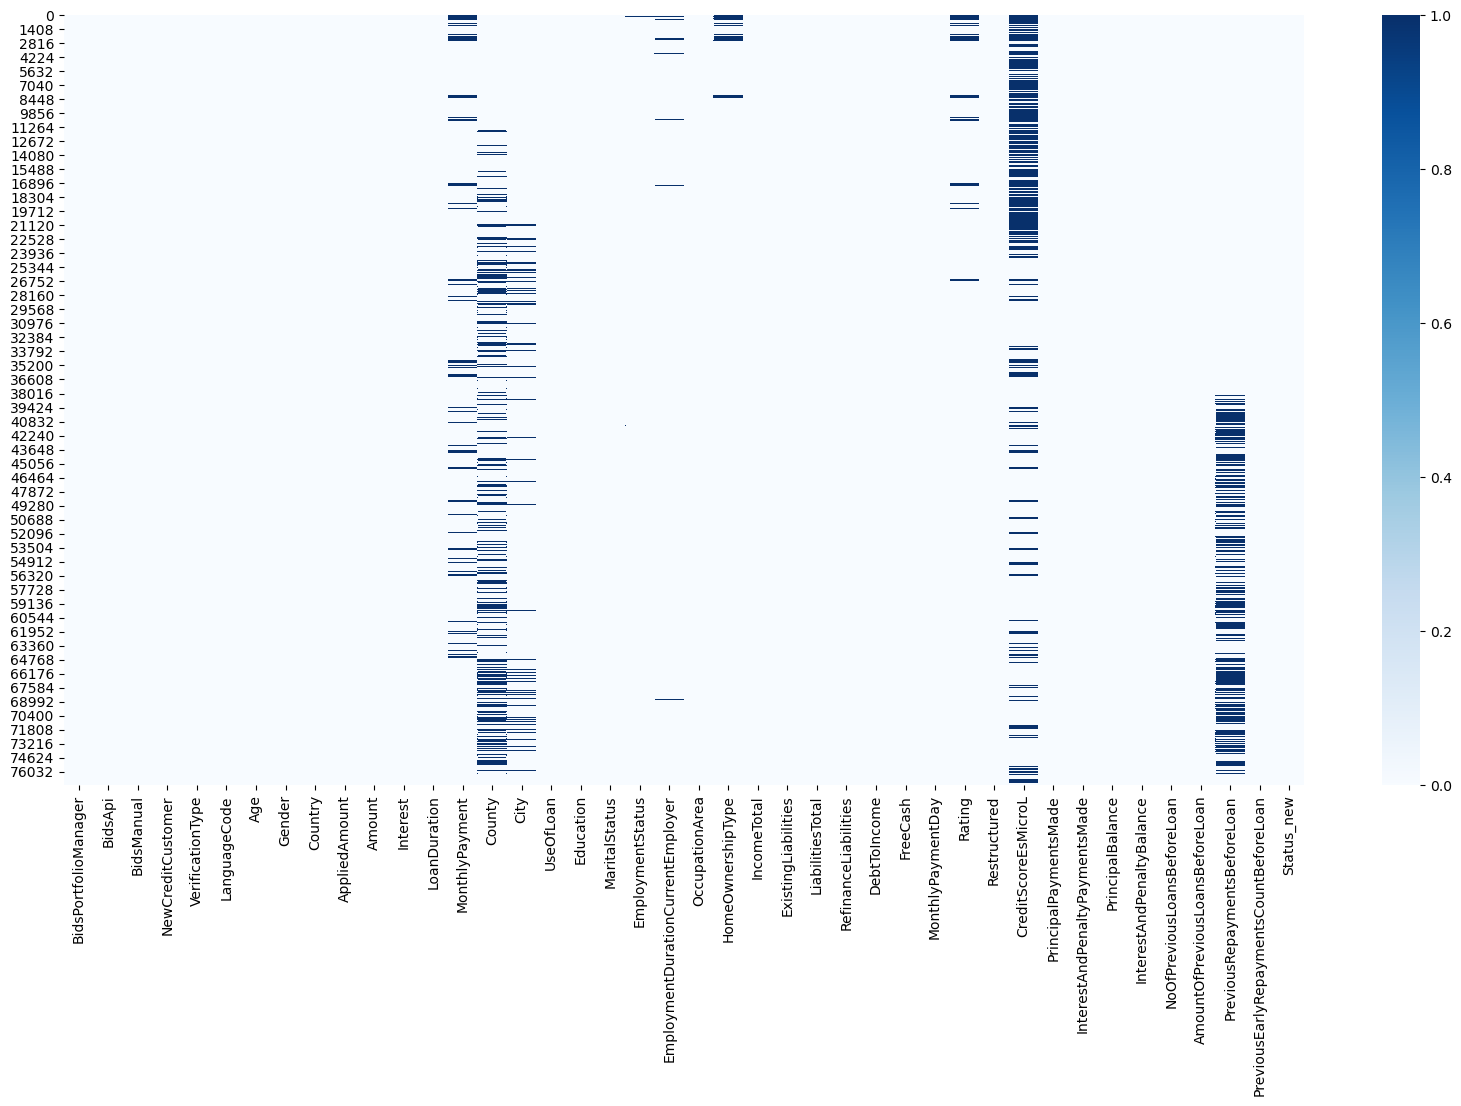

In [122]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isnull(), cmap='Blues');

As we know the Residency of the borrower(Country), we no more need unnecessary details like his division, city etc., Also there are many missing values here. We can't exactly predict the County and City of borrower. Hence County and City columns can be dropped.

In [123]:
df.drop(['County', 'CreditScoreEsMicroL', 'PreviousRepaymentsBeforeLoan'], axis=1, inplace=True)

In [124]:
numeric_columns = df.select_dtypes(include=['int','float']).columns
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')
numeric_means = df[numeric_columns].mean()

In [125]:
df[numeric_columns] = df[numeric_columns].fillna(numeric_means)

In [126]:
df = df.fillna(df.mode().iloc[0])

In [127]:
df.isnull().sum()

BidsPortfolioManager                      0
BidsApi                                   0
BidsManual                                0
NewCreditCustomer                         0
VerificationType                          0
LanguageCode                              0
Age                                       0
Gender                                    0
Country                                   0
AppliedAmount                             0
Amount                                    0
Interest                                  0
LoanDuration                              0
MonthlyPayment                            0
City                                      0
UseOfLoan                                 0
Education                                 0
MaritalStatus                             0
EmploymentStatus                          0
EmploymentDurationCurrentEmployer         0
OccupationArea                            0
HomeOwnershipType                         0
IncomeTotal                     

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77394 entries, 0 to 77393
Data columns (total 39 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   BidsPortfolioManager                    77394 non-null  int64  
 1   BidsApi                                 77394 non-null  int64  
 2   BidsManual                              77394 non-null  float64
 3   NewCreditCustomer                       77394 non-null  bool   
 4   VerificationType                        77394 non-null  object 
 5   LanguageCode                            77394 non-null  object 
 6   Age                                     77394 non-null  int64  
 7   Gender                                  77394 non-null  object 
 8   Country                                 77394 non-null  object 
 9   AppliedAmount                           77394 non-null  float64
 10  Amount                                  77394 non-null  fl

Let's save this final preprocessed data into csv

In [129]:
df.to_csv('Bondora_preprocessed2.csv',index=False)

# Univartiate Analysis

In [130]:
num_col = [col for col in df if df[col].dtype in ['int64']] + [col for col in df if df[col].dtype in ['float64']]
cat_col = [col for col in df if df[col].dtype in ['object']]
bool_col = ['NewCreditCustomer','Restructured']

In [131]:
num_data=df.drop(cat_col, axis=1)
num_data=num_data.drop(bool_col, axis=1)

In [132]:
cat_data=df.select_dtypes(include=object)

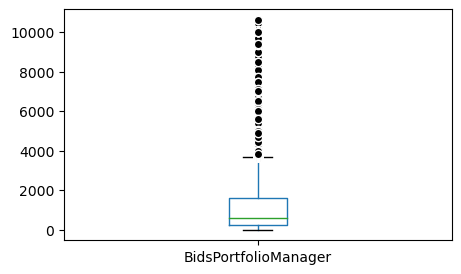

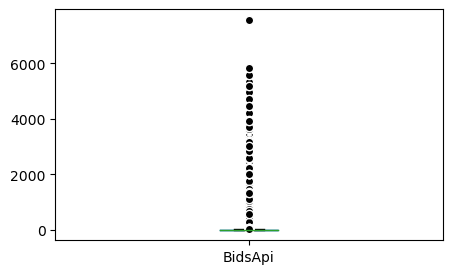

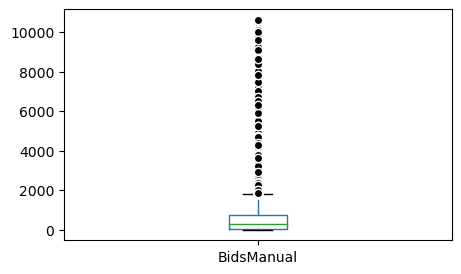

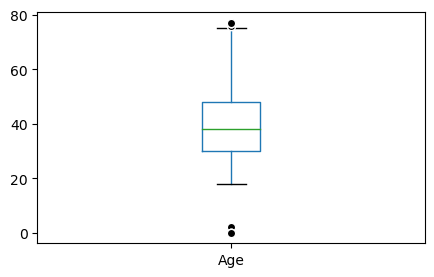

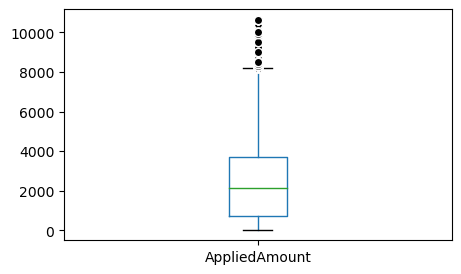

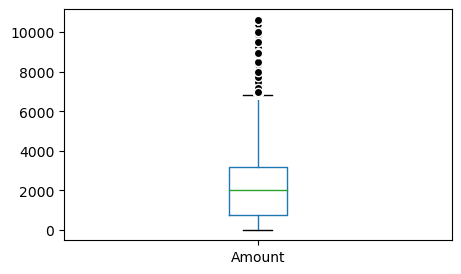

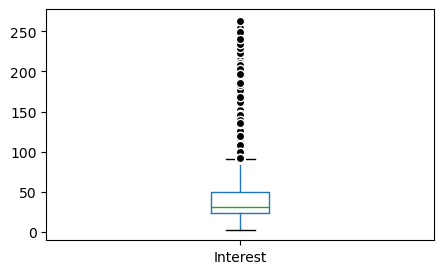

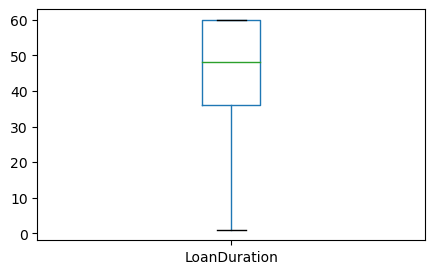

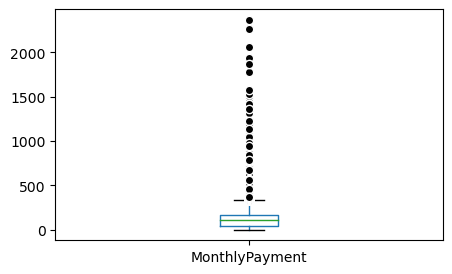

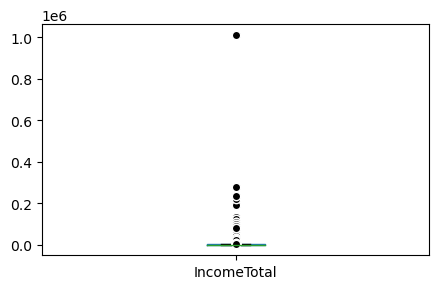

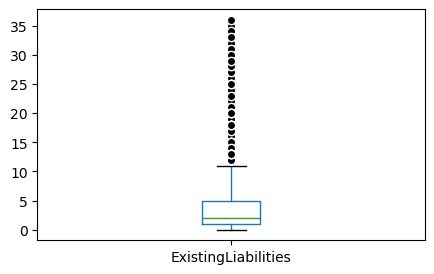

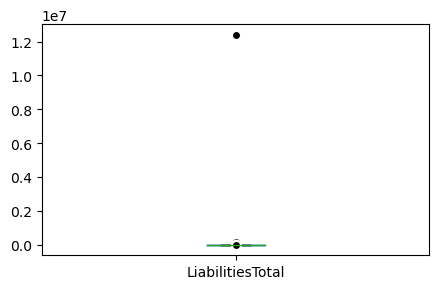

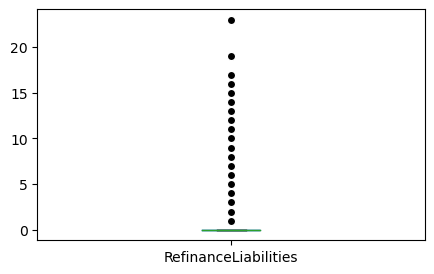

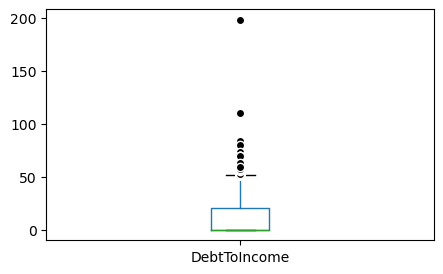

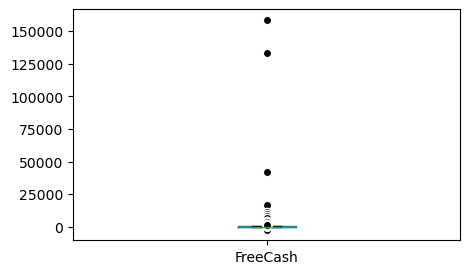

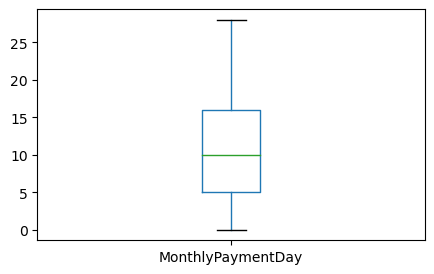

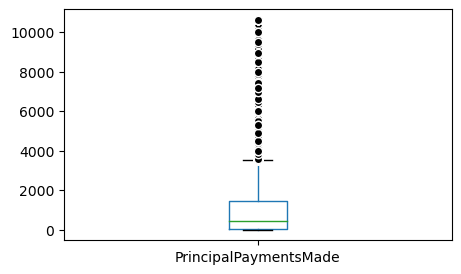

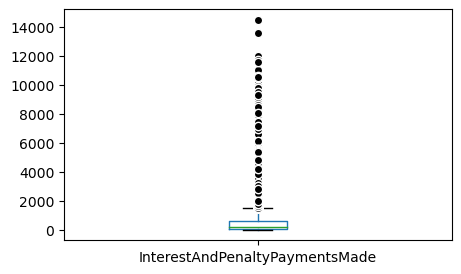

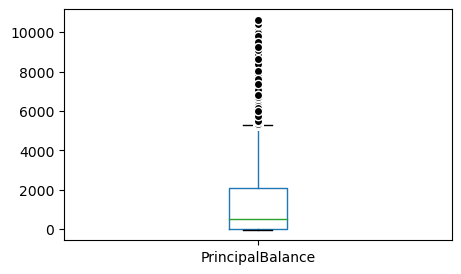

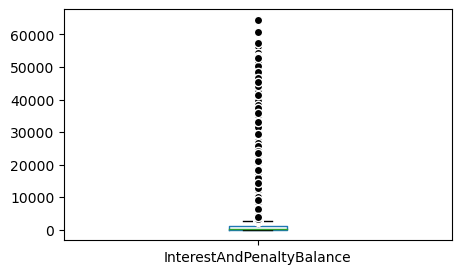

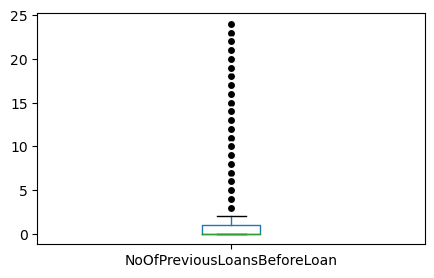

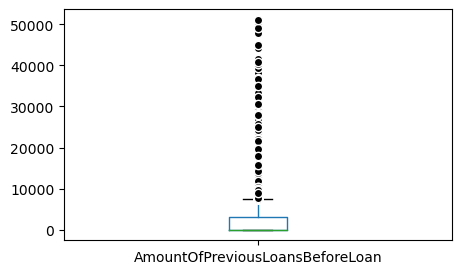

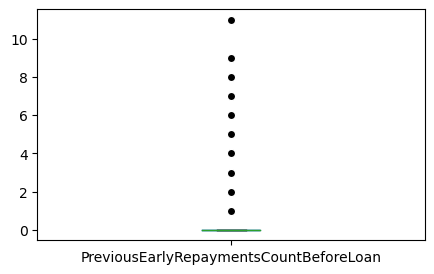

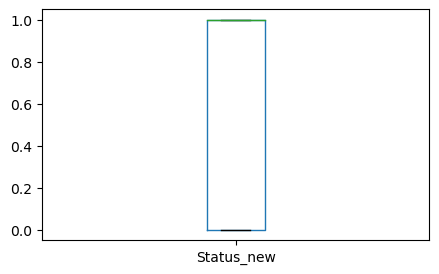

In [133]:
flierprops = dict(marker='o', markeredgecolor='white', markerfacecolor='black')
for column in num_data:
    plt.figure(figsize=(5,3))
    num_data.boxplot([column], grid=False, flierprops=flierprops)

We can see there are lot of outliers present where LoanDuration, MonethlyPaymentDay, Status_new are outlier free
There are very few outliers present in columns Age, LiabilitiesTotal

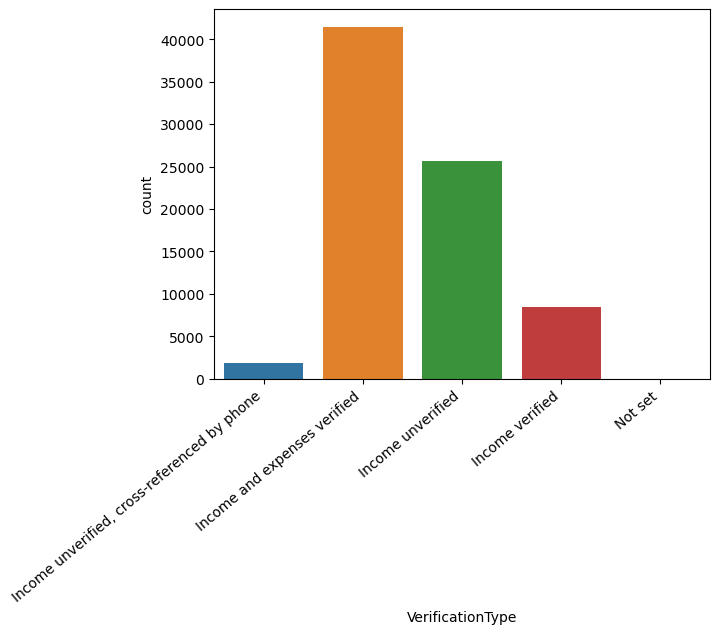

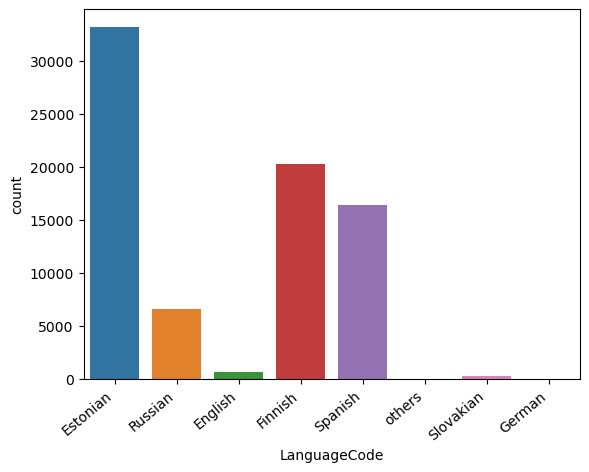

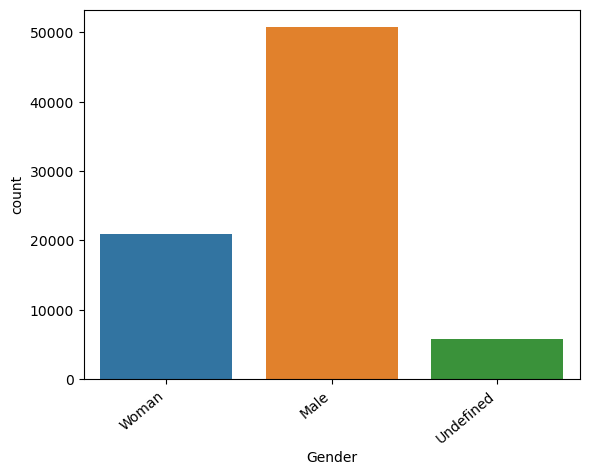

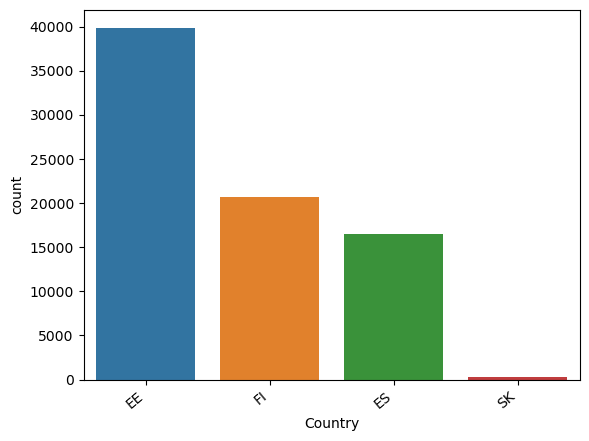

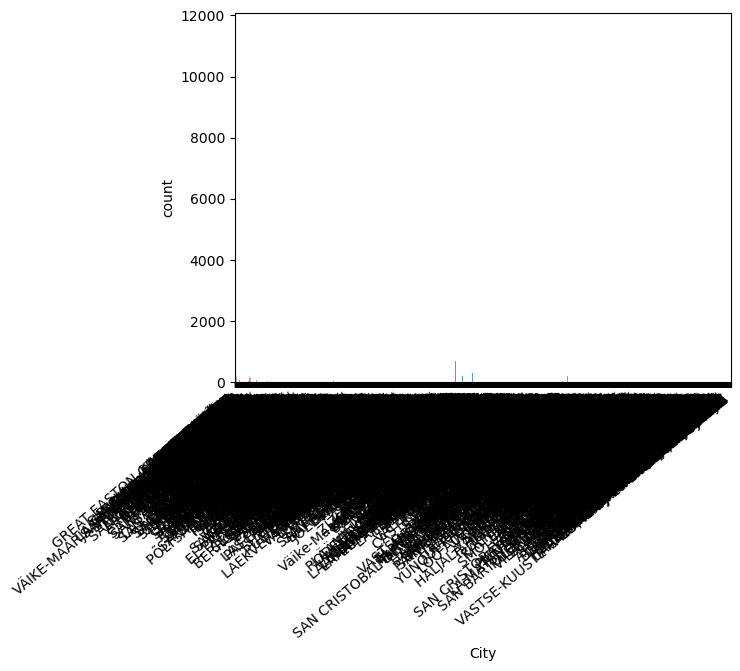

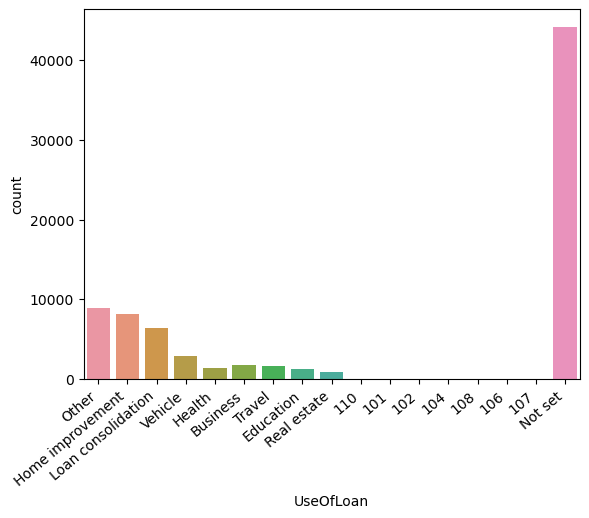

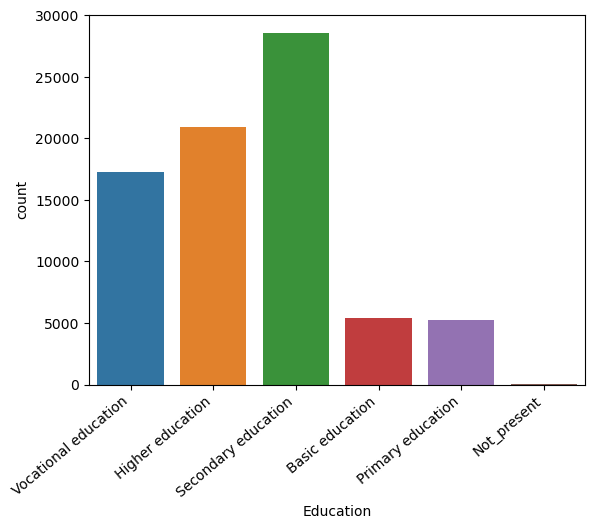

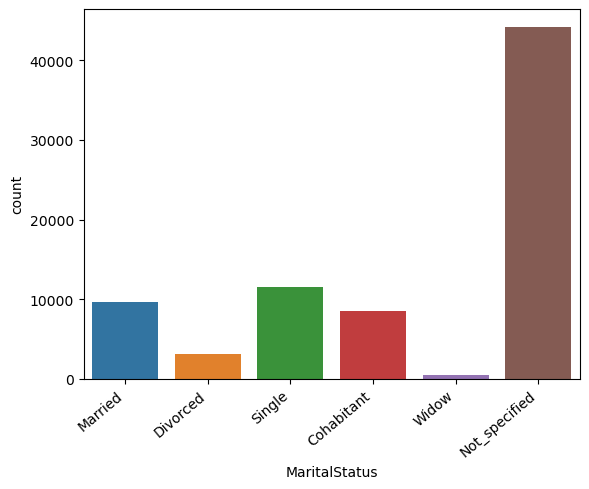

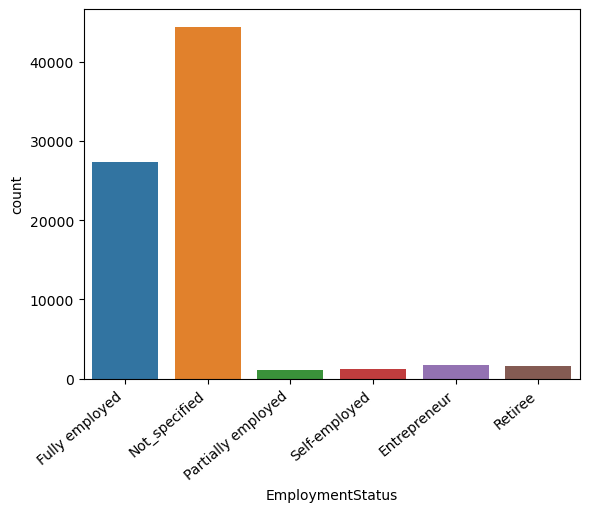

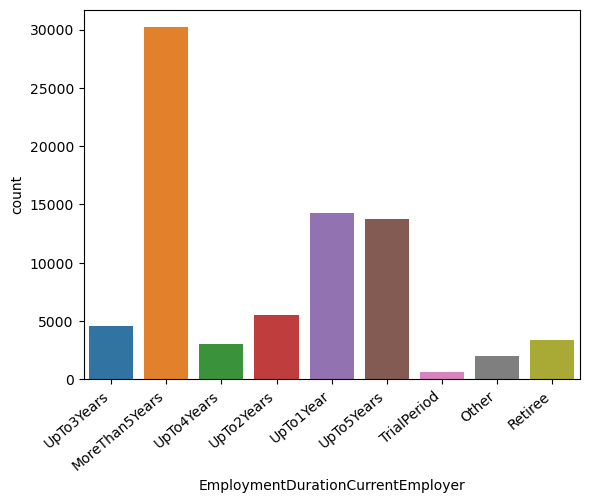

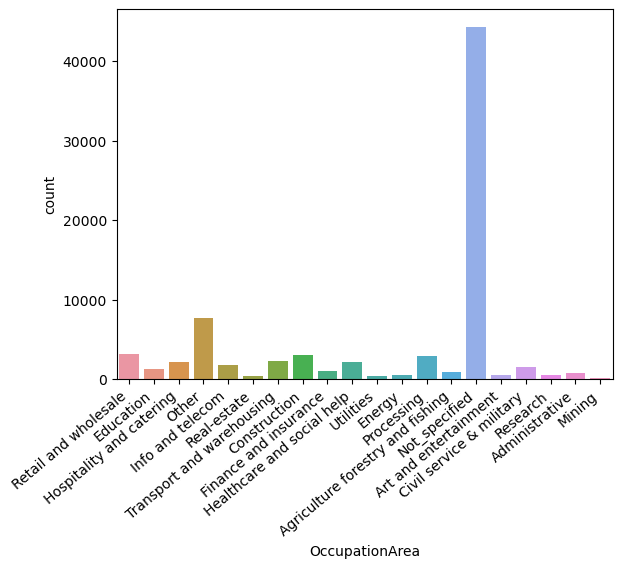

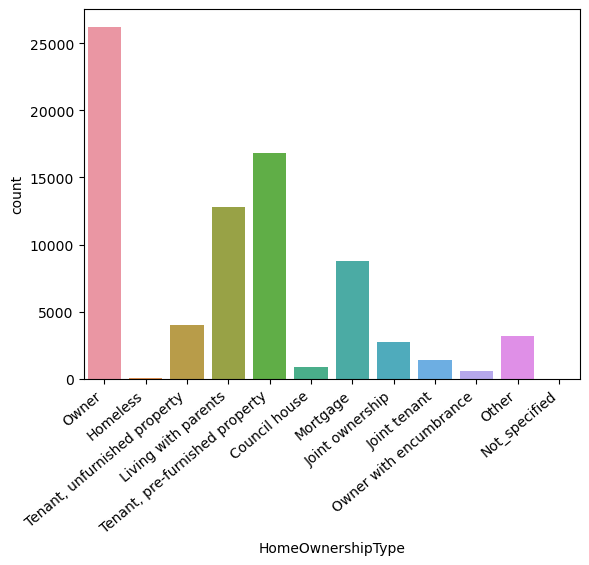

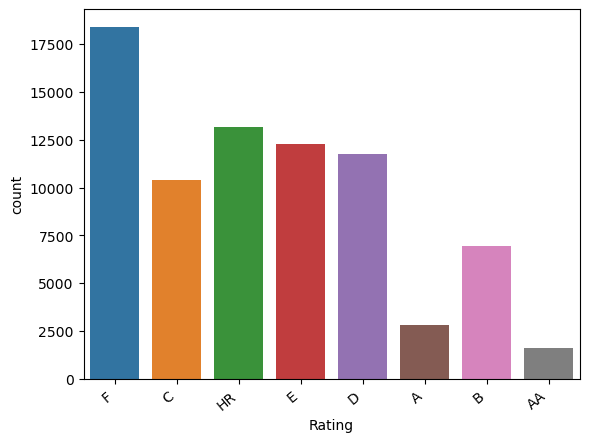

In [134]:
for col in cat_data:
    sns.countplot(cat_data[col])
    plt.xticks(rotation=40, horizontalalignment='right', fontsize=10)
    plt.show()

We can observe that there are some categorical columns with high not specified/set data
- UseOfLoan
- MaritalStatus
- EmploymentStatus
- OccupationArea

While HomeOwnershipType, Education and VerificationType have few Not set data and the remaining columns are completely defined

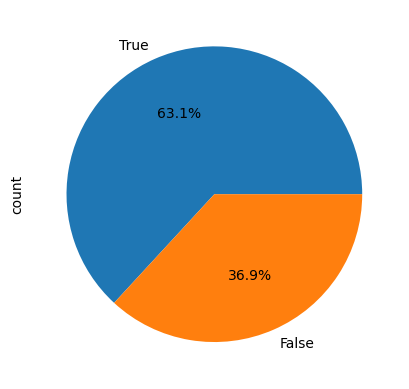

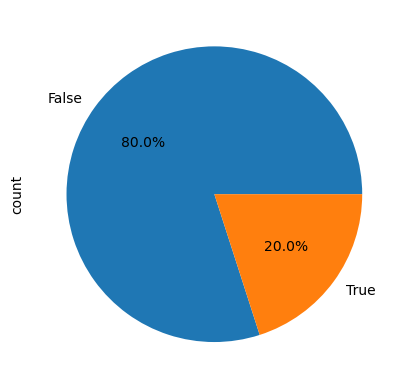

In [135]:
for col in bool_col:
    df[col].value_counts().plot(kind='pie',autopct='%1.1f%%')
    plt.show();

From the plot
- More than 63% customers have no prior credit history in Bondora
- The original maturity date has been increased by more than 60 days only for 20% of the loans

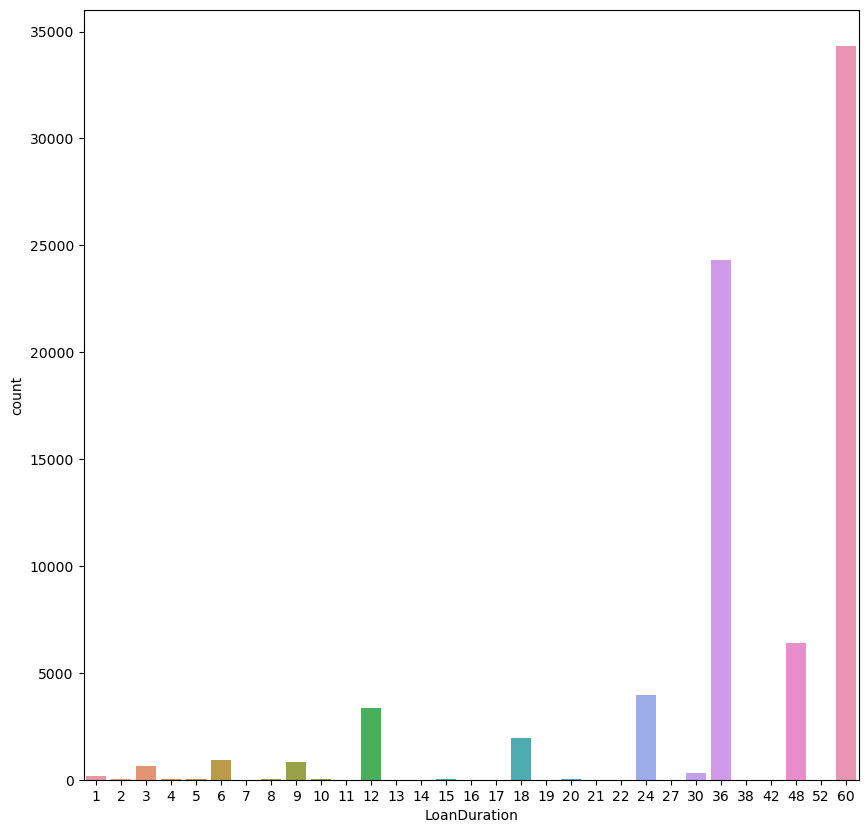

In [136]:
fig, ax=plt.subplots(figsize=(10,10))
sns.countplot(df['LoanDuration'], ax=ax)
plt.show()

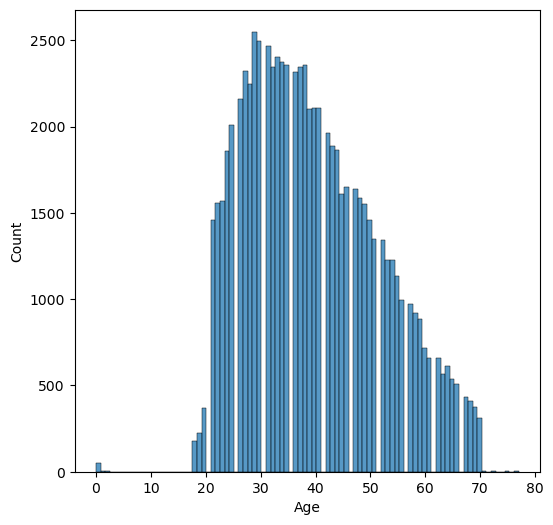

In [137]:
plt.figure(figsize=(6,6))
sns.histplot(df['Age']);

We can observe the most borrowers are of age around 25-40

Those borrowers of low age(0-2) might be outliers

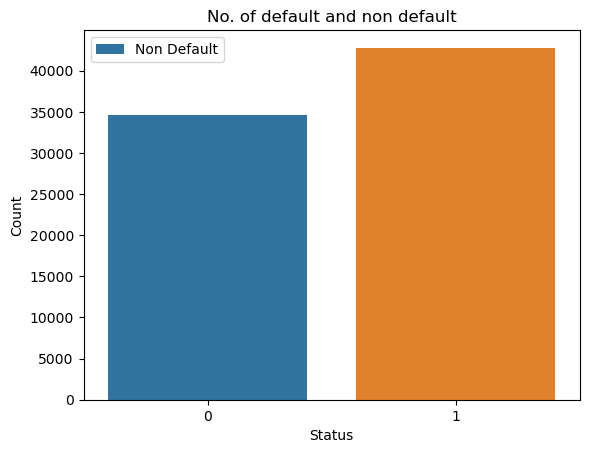

In [138]:
plt.figure()
sns.countplot(x='Status_new', data=df)
plt.title('No. of default and non default')
plt.xlabel('Status')
plt.ylabel('Count')
plt.legend(['Non Default'])
plt.show()

# Bivariate Analysis

In [139]:
df['Status_new'].value_counts()

Status_new
1    42794
0    34600
Name: count, dtype: int64

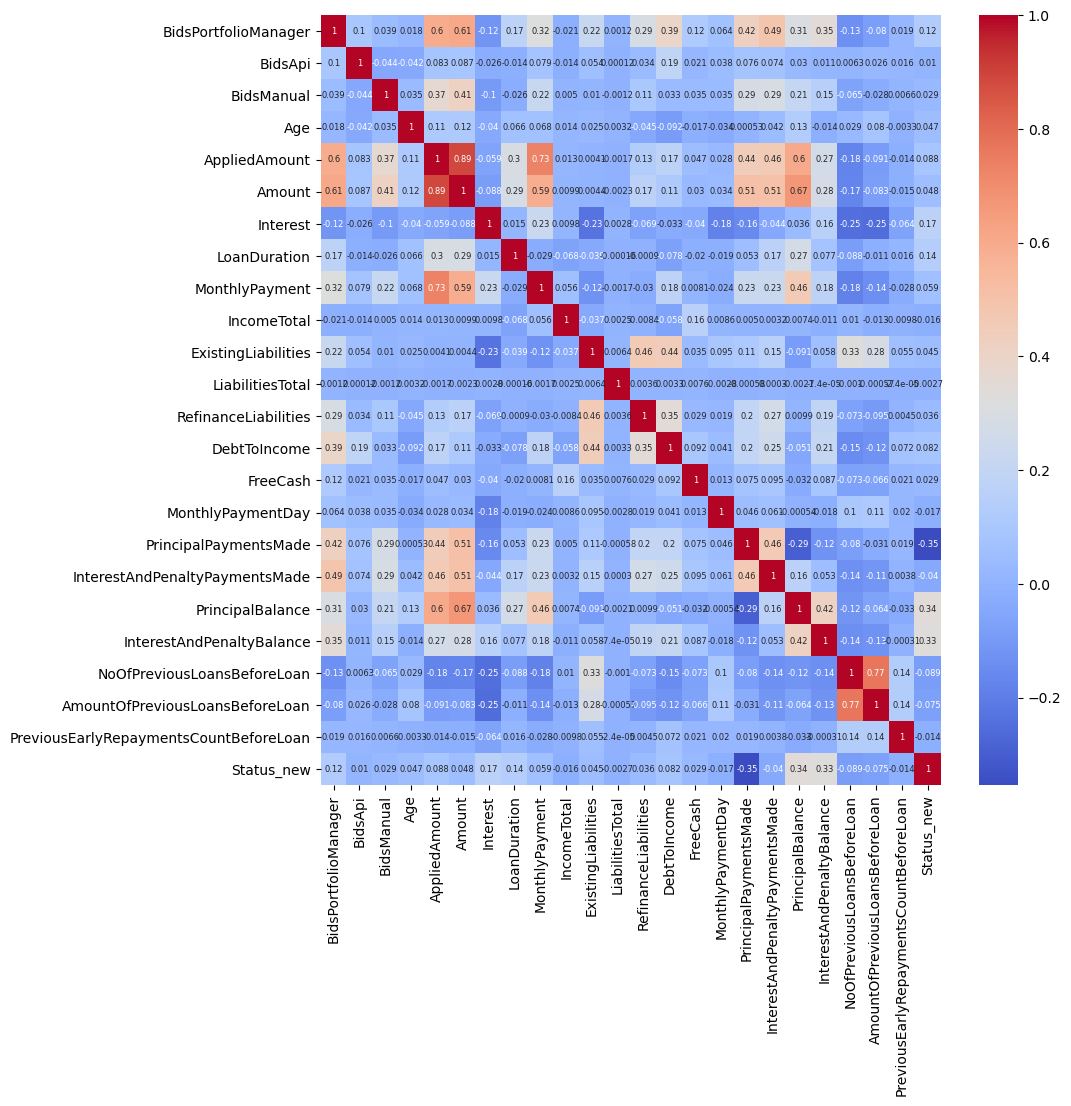

In [140]:
plt.figure(figsize=(10,10))
sns.heatmap(num_data.corr(), annot=True,annot_kws={"size": 6},cmap='coolwarm');

Observations from correlation matrix:
- Target variable is highly negatively correlated with PrincipalPaymentsMade
- Target variable is positively correlated with InterestAndPenaltyBalance and PrincipalBalance

In [141]:
corr_matrix = num_data.corr()

In [142]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
high_pos_corr = [column for column in upper.columns if any(upper[column] > 0.5)]

In [143]:
high_pos_corr

['AppliedAmount',
 'Amount',
 'MonthlyPayment',
 'PrincipalPaymentsMade',
 'InterestAndPenaltyPaymentsMade',
 'PrincipalBalance',
 'AmountOfPreviousLoansBeforeLoan']

<AxesSubplot:>

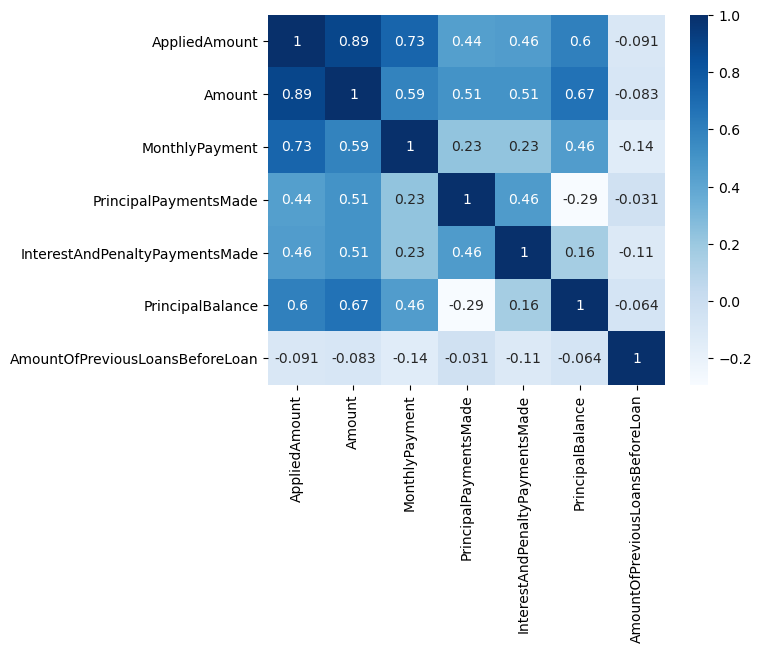

In [144]:
sns.heatmap(df[high_pos_corr].corr(), annot=True,cmap='Blues')

- AppiledAmount, Amount, MonthlyPayment, PrincipalBalance are highly correlated
- Amount, PrincipalPaymentsMade are highly correlated
- PreviousRepaymentsBeforeLoan is correlated with AmountOfPreviousLoansBeforeLoan

In [145]:
high_neg_corr = [column for column in upper.columns if any(upper[column] < -0.5)]

In [146]:
upper

,BidsPortfolioManager,BidsApi,BidsManual,Age,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,Status_new
BidsPortfolioManager,NaN,0.100354,0.038683,0.018176,0.597562,0.611067,-0.118746,0.172791,0.318258,-0.020684,0.217343,0.001181,0.289453,0.394098,0.120089,0.063698,0.423480,0.491630,0.305721,0.349070,-0.133753,-0.080246,0.018837,0.122154
BidsApi,NaN,NaN,-0.043737,-0.041827,0.083480,0.087201,-0.026198,-0.014436,0.079356,-0.013512,0.053673,0.000123,0.033556,0.187302,0.020789,0.037879,0.076033,0.073700,0.030368,0.010877,0.006260,0.025645,0.016336,0.010189
BidsManual,NaN,NaN,NaN,0.034868,0.368789,0.414369,-0.099817,-0.026149,0.218909,0.004997,0.010350,-0.001167,0.105129,0.032522,0.035256,0.035373,0.285131,0.286793,0.210582,0.152551,-0.064627,-0.027779,0.006572,0.029316
Age,NaN,NaN,NaN,NaN,0.108451,0.115197,-0.039835,0.065847,0.067565,0.013683,0.024595,0.003161,-0.045381,-0.091610,-0.016813,-0.034257,0.000527,0.042376,0.128580,-0.013684,0.028617,0.079883,-0.003338,0.047164
AppliedAmount,NaN,NaN,NaN,NaN,NaN,0.890612,-0.058711,0.295962,0.733004,0.012901,0.004062,-0.001740,0.132670,0.174226,0.046511,0.027530,0.442894,0.455388,0.603708,0.268875,-0.175454,-0.091219,-0.013590,0.088160
Amount,NaN,NaN,NaN,NaN,NaN,NaN,-0.088229,0.289665,0.590991,0.009901,0.004364,-0.002290,0.166372,0.112111,0.030231,0.034247,0.508962,0.506132,0.668613,0.277667,-0.172076,-0.083499,-0.015425,0.048411
Interest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.015011,0.227801,0.009824,-0.228342,0.002761,-0.069104,-0.033036,-0.039762,-0.183141,-0.155728,-0.044483,0.036034,0.157471,-0.245920,-0.253085,-0.063738,0.165912
LoanDuration,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.028521,-0.068126,-0.038560,-0.000164,-0.000904,-0.078458,-0.019573,-0.019345,0.052966,0.167194,0.274160,0.077332,-0.088370,-0.010919,0.016002,0.141341
MonthlyPayment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.056068,-0.122454,-0.001739,-0.029715,0.177185,0.008145,-0.023883,0.231866,0.231847,0.455189,0.177775,-0.180039,-0.142286,-0.027516,0.059404
IncomeTotal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.037210,0.002544,-0.008396,-0.058051,0.159170,0.008615,0.004968,0.003183,0.007388,-0.010971,0.010312,-0.013277,-0.009802,-0.015941


In [147]:
high_neg_corr

[]

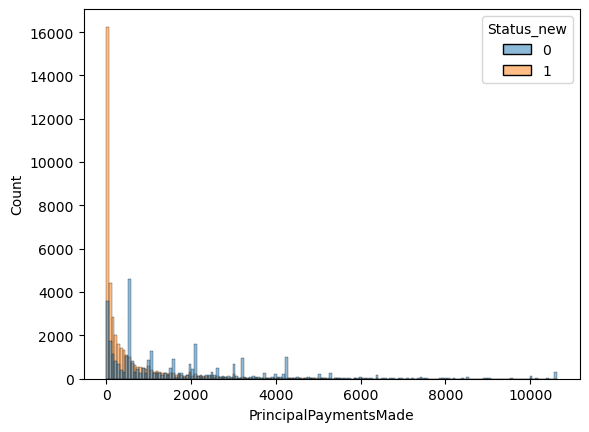

In [148]:
sns.histplot(x='PrincipalPaymentsMade', hue='Status_new', data=df);

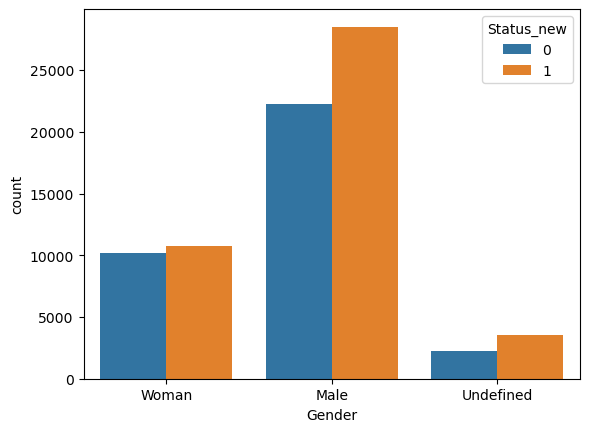

In [149]:
sns.countplot('Gender', hue='Status_new', data=df);

We can observe defaulted loans are high irrespective of gender

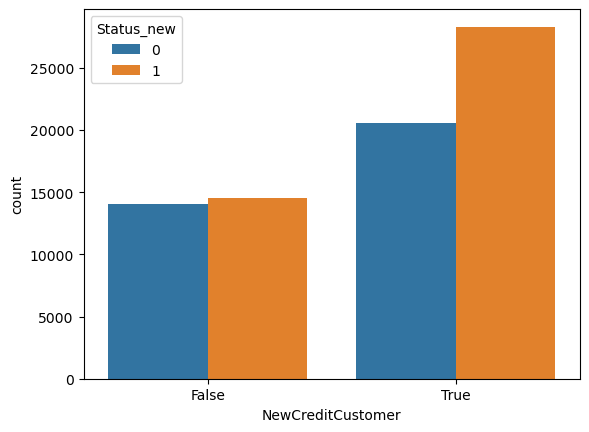

In [150]:
sns.countplot('NewCreditCustomer', hue='Status_new', data=df);

Defaulted loans of the cutomers with no prior history in Bondora are high and Status of default and non default loans are almost equal for customers with prior credit history in Bondora

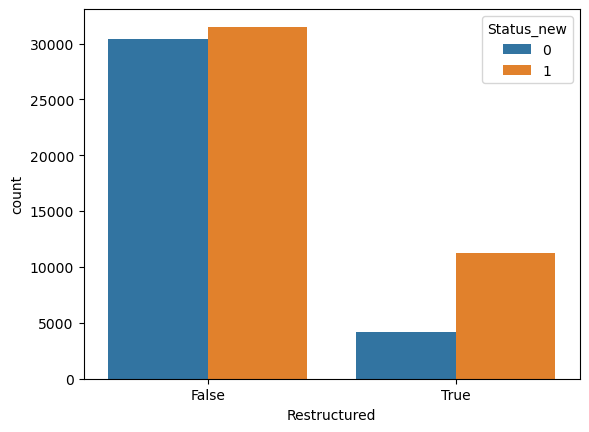

In [151]:
sns.countplot('Restructured', hue='Status_new', data=df);

We can't interpret much from this

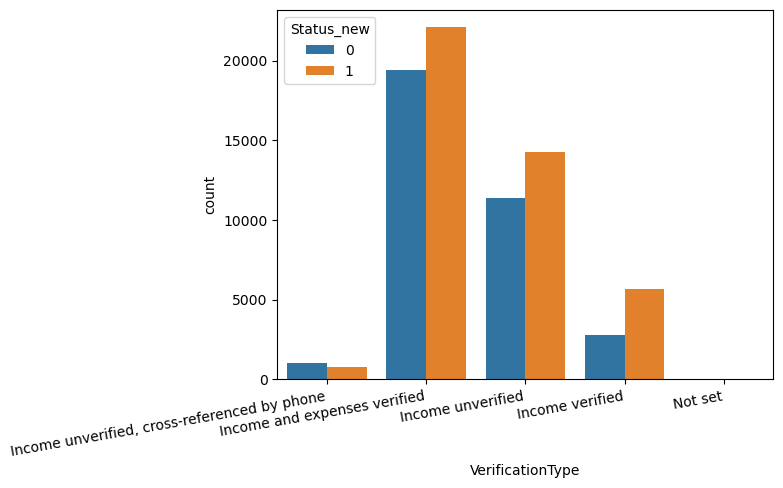

In [152]:
sns.countplot('VerificationType', hue='Status_new', data=df)
plt.xticks(rotation=10, horizontalalignment='right', fontsize=10);

In [153]:
cat_col

['VerificationType',
 'LanguageCode',
 'Gender',
 'Country',
 'City',
 'UseOfLoan',
 'Education',
 'MaritalStatus',
 'EmploymentStatus',
 'EmploymentDurationCurrentEmployer',
 'OccupationArea',
 'HomeOwnershipType',
 'Rating']

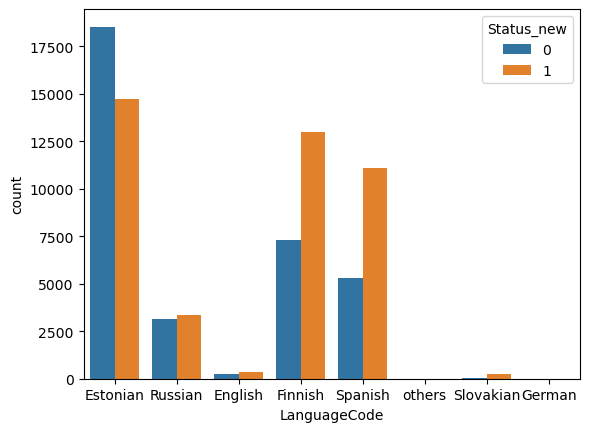

In [154]:
sns.countplot('LanguageCode',hue='Status_new', data=df);

Defaulted loans of Estonians are less than Non defaulted loans. While all others have Default loans high 

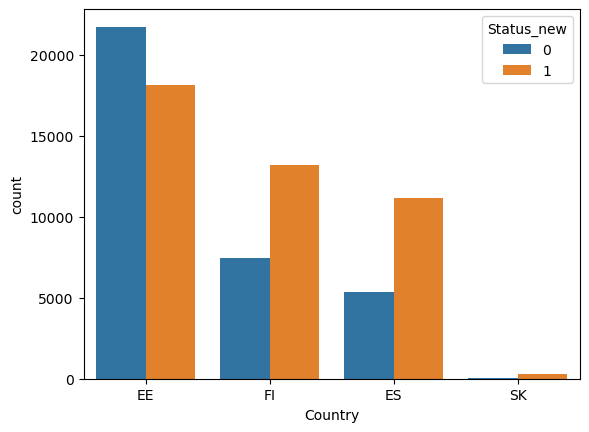

In [155]:
sns.countplot('Country',hue='Status_new',data=df);

# <font color=red>**Feature Engineering**</font>

In [156]:
import numpy as np
import pandas as pd 
pd.set_option('display.max_columns', 500)
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import mutual_info_classif as MIC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA


In [157]:
df = pd.read_csv('Bondora_preprocessed2.csv')
df.head()

,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,VerificationType,LanguageCode,Age,Gender,Country,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,City,UseOfLoan,Education,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,Rating,Restructured,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,Status_new
0,0,0,115.0410,True,"Income unverified, cross-referenced by phone",Estonian,61,Woman,EE,319.5582,115.0408,30.0,12,130.393314,TALLINN,Other,Vocational education,Married,Fully employed,UpTo3Years,Retail and wholesale,Owner,10500.0,0,0.0,0,0.0,0.0,25,F,False,115.0408,20.4222,0.00,0.00,1,83.0852,0,0
1,0,0,140.6057,False,"Income unverified, cross-referenced by phone",Estonian,48,Woman,EE,191.7349,140.6057,25.0,1,130.393314,KOHTLA-JARVE,Other,Higher education,Divorced,Fully employed,MoreThan5Years,Education,Owner,10800.0,0,0.0,0,0.0,0.0,15,F,False,140.6057,2.0227,0.00,0.00,2,255.6467,0,0
2,0,0,319.5580,True,"Income unverified, cross-referenced by phone",Estonian,58,Woman,EE,319.5582,319.5409,25.0,20,130.393314,PÄRNU,Home improvement,Secondary education,Married,Fully employed,UpTo4Years,Hospitality and catering,Owner,7000.0,0,0.0,0,0.0,0.0,25,F,True,203.1909,59.7626,116.35,414.07,0,0.0000,0,1
3,0,0,57.5205,True,"Income unverified, cross-referenced by phone",Estonian,23,Woman,EE,127.8233,57.5205,45.0,15,130.393314,PALDISKI,Loan consolidation,Basic education,Single,Not_specified,UpTo2Years,Other,Owner,11600.0,0,0.0,0,0.0,0.0,15,F,False,57.5205,18.7323,0.00,0.00,1,134.2144,0,0
4,0,0,319.5582,True,"Income unverified, cross-referenced by phone",Estonian,25,Woman,EE,319.5582,319.5436,30.0,12,130.393314,TARTU,Vehicle,Secondary education,Cohabitant,Fully employed,UpTo2Years,Retail and wholesale,Owner,6800.0,0,0.0,0,0.0,0.0,25,F,False,319.5436,220.4200,0.00,0.00,1,146.9966,0,1


In [158]:
df.shape

(77394, 39)

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77394 entries, 0 to 77393
Data columns (total 39 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   BidsPortfolioManager                    77394 non-null  int64  
 1   BidsApi                                 77394 non-null  int64  
 2   BidsManual                              77394 non-null  float64
 3   NewCreditCustomer                       77394 non-null  bool   
 4   VerificationType                        77394 non-null  object 
 5   LanguageCode                            77394 non-null  object 
 6   Age                                     77394 non-null  int64  
 7   Gender                                  77394 non-null  object 
 8   Country                                 77394 non-null  object 
 9   AppliedAmount                           77394 non-null  float64
 10  Amount                                  77394 non-null  fl

In [160]:
num_col = df.select_dtypes(include=np.number).columns.tolist()

In [161]:
num_data = df[num_col]

In [162]:
X = df.copy()
y = X.pop('Status_new')

In [163]:
def score_dataset(X, y, model=XGBClassifier()):
    # Label encoding for categoricals
    for colname in X.select_dtypes(["category", "object"]):
        X[colname], _ = X[colname].factorize()
    
    # Metric for classification is accuracy
    scoring = 'accuracy'
    
    # Perform cross-validation and calculate mean accuracy score
    scores = cross_val_score(model, X, y, cv=5, scoring=scoring)
    mean_score = scores.mean()
    
    return mean_score

In [164]:
score_dataset(X,y)

0.9139720729720631

In [165]:
def miscore(X, y):
    mi_scores = MIC(X,y)
    mi_score = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_score = mi_score.sort_values(ascending=False)
    return mi_score

In [166]:
mi_score = miscore(X,y)
mi_score

InterestAndPenaltyBalance                 0.344141
PrincipalPaymentsMade                     0.283270
PrincipalBalance                          0.252172
InterestAndPenaltyPaymentsMade            0.068684
Interest                                  0.058738
MonthlyPayment                            0.057901
City                                      0.050006
Amount                                    0.045869
AppliedAmount                             0.041860
Rating                                    0.028624
LanguageCode                              0.026490
BidsPortfolioManager                      0.025694
IncomeTotal                               0.021930
Country                                   0.021480
LoanDuration                              0.018022
Restructured                              0.017005
MonthlyPaymentDay                         0.014600
BidsManual                                0.013371
LiabilitiesTotal                          0.010061
Education                      

In [167]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

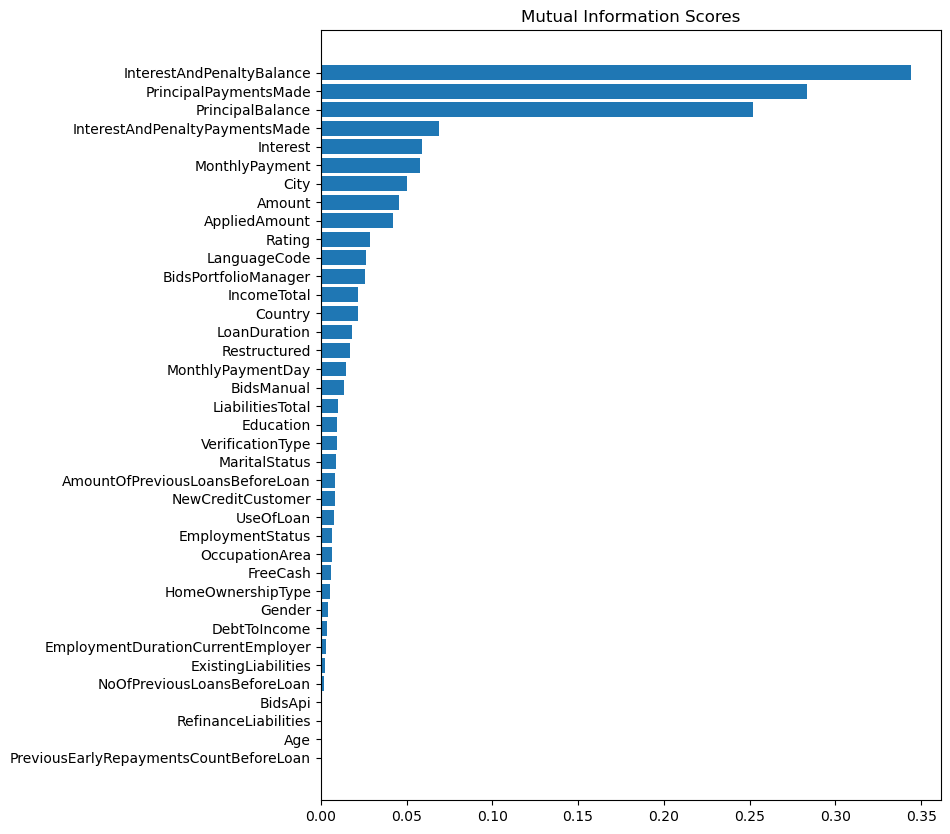

In [168]:
plt.figure(dpi=100, figsize=(8, 10))
plot_mi_scores(mi_score)

In [169]:
mi_score.head(10)

InterestAndPenaltyBalance         0.344141
PrincipalPaymentsMade             0.283270
PrincipalBalance                  0.252172
InterestAndPenaltyPaymentsMade    0.068684
Interest                          0.058738
MonthlyPayment                    0.057901
City                              0.050006
Amount                            0.045869
AppliedAmount                     0.041860
Rating                            0.028624
Name: MI Scores, dtype: float64

## Handling Outliers

In [170]:
X = df.copy()
for i in num_data.columns:
    Q1 = X[i].quantile(0.25)
    Q3 = X[i].quantile(0.75)
    IQR = Q3 - Q1
    lower_extreme = Q1 - 1.5 * IQR
    upper_extreme = Q3 + 1.5 * IQR
    median = X[i].median()
    out1 = X[(X[i]<lower_extreme)].values
    out2 = X[X[i]>upper_extreme].values
    X[i].replace(out1, median, inplace=True)
    X[i].replace(out2,median,inplace=True)

In [171]:
y = X.pop('Status_new')

In [172]:
score_dataset(X,y)

0.9139720729720631

In [173]:
mi_score = miscore(X, y)
mi_score

InterestAndPenaltyBalance                 0.344765
PrincipalPaymentsMade                     0.283408
PrincipalBalance                          0.251266
InterestAndPenaltyPaymentsMade            0.069096
Interest                                  0.061724
MonthlyPayment                            0.058348
City                                      0.052887
Amount                                    0.042576
AppliedAmount                             0.039951
Rating                                    0.026962
Country                                   0.024213
BidsPortfolioManager                      0.023460
LanguageCode                              0.023158
IncomeTotal                               0.023073
LoanDuration                              0.022439
Restructured                              0.016581
MonthlyPaymentDay                         0.014815
BidsManual                                0.012683
FreeCash                                  0.010954
AmountOfPreviousLoansBeforeLoan

In [174]:
# plt.figure(dpi=100, figsize=(8, 10))
# plot_mi_scores(mi_score)

## Feature Creation

Create the following features:
- PrincipalPaymentDifference: The difference of PrincipalPaymentsMade and PrincipalBalance
- AvgMonthlyPayment: This is the average monthly payment for each Rating category

In [175]:
X1 = pd.DataFrame()
X1['PrincipalPaymentDifference'] = X['PrincipalPaymentsMade']-X['PrincipalBalance']

In [176]:
# rating_avg_payment = X.groupby('Rating')['MonthlyPayment'].mean().reset_index()
# rating_avg_payment.columns = ['Rating', 'AvgMonthlyPayment']

In [177]:
X_new = X.join([X1])

In [178]:
# X_new = pd.merge(X_new, rating_avg_payment, on='Rating', how='left')

In [179]:
score_dataset(X_new, y)

0.9158327375853315

In [180]:
mi_score=miscore(X_new,y)

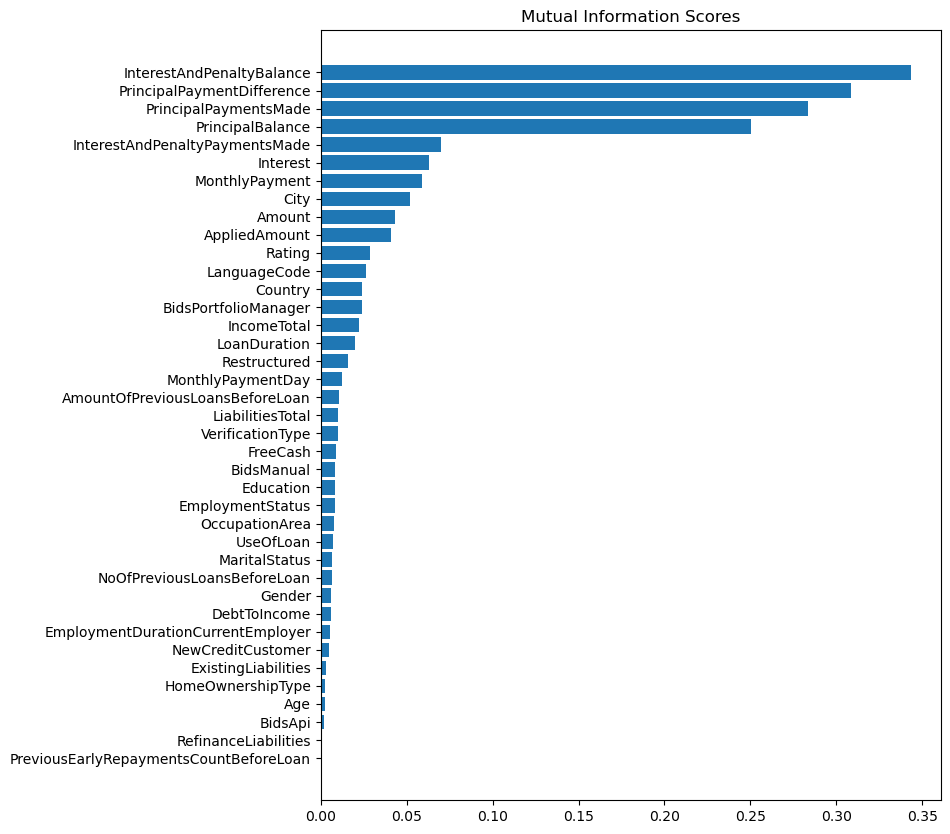

In [181]:
plt.figure(dpi=100, figsize=(8, 10))
plot_mi_scores(mi_score)

In [182]:
mi_score

InterestAndPenaltyBalance                 0.343539
PrincipalPaymentDifference                0.308770
PrincipalPaymentsMade                     0.283633
PrincipalBalance                          0.250535
InterestAndPenaltyPaymentsMade            0.069765
Interest                                  0.063002
MonthlyPayment                            0.059168
City                                      0.052048
Amount                                    0.043035
AppliedAmount                             0.040937
Rating                                    0.028621
LanguageCode                              0.026437
Country                                   0.024168
BidsPortfolioManager                      0.023821
IncomeTotal                               0.022244
LoanDuration                              0.019782
Restructured                              0.015844
MonthlyPaymentDay                         0.012396
AmountOfPreviousLoansBeforeLoan           0.010911
LiabilitiesTotal               

We've got some important columns after knowing MI Score and performing Feature Creation

## Standardization

In [183]:
scaler = preprocessing.StandardScaler()
X_new1 = scaler.fit_transform(X_new)

In [184]:
X_new1
X_scaled1 = pd.DataFrame(X_new1, columns=X_new.columns)
X_scaled1

,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,VerificationType,LanguageCode,Age,Gender,Country,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,City,UseOfLoan,Education,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,Rating,Restructured,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,PrincipalPaymentDifference
0,-0.797744,-0.200338,-0.545166,0.764047,-2.125478,-1.029636,1.754759,-1.453178,-0.870185,-0.985367,-1.089632,-0.336460,-1.975685,2.260636e-16,-0.834083,-1.427100,-1.336016,-1.921731,-0.867972,-1.349599,-2.168156,-1.108743,1.393574,-0.958936,-0.016033,-0.267193,-0.638120,-0.230120,1.859769,-1.219449,-0.500610,-0.583783,-0.581728,-0.705794,-0.377336,-0.069426,-0.537235,-0.201408,0.141593
1,-0.797744,-0.200338,-0.514056,-1.308820,-2.125478,-1.029636,0.688205,-1.453178,-0.870185,-1.037254,-1.077817,-0.499764,-2.645915,2.260636e-16,-0.833479,-1.427100,-0.438598,-1.380397,-0.867972,-0.882531,-1.966978,-1.108743,1.442012,-0.958936,-0.016033,-0.267193,-0.638120,-0.230120,0.496648,-1.219449,-0.500610,-0.568278,-0.603919,-0.705794,-0.377336,0.423663,-0.492869,-0.201408,0.150428
2,-0.797744,-0.200338,-0.296287,0.764047,-2.125478,-1.029636,1.508631,-1.453178,-0.870185,-0.985367,-0.995118,-0.499764,-1.488245,2.260636e-16,-0.832876,-1.284852,0.458820,-1.921731,-0.867972,-0.415463,-1.765799,-1.108743,0.828460,-0.958936,-0.016033,-0.267193,-0.638120,-0.230120,1.859769,-1.219449,1.997564,-0.530321,-0.534282,-0.645952,-0.248742,-0.562515,-0.558596,-0.201408,0.131846
3,-0.797744,-0.200338,-0.615163,0.764047,-2.125478,-1.029636,-1.362860,-1.453178,-0.870185,-1.063198,-1.116217,0.153452,-1.792895,2.260636e-16,-0.832272,-1.142604,1.356239,-0.839063,0.159904,0.051605,-1.564621,-1.108743,1.571181,-0.958936,-0.016033,-0.267193,-0.638120,-0.230120,0.496648,-1.219449,-0.500610,-0.618668,-0.583766,-0.705794,-0.377336,-0.069426,-0.524089,-0.201408,0.121713
4,-0.797744,-0.200338,-0.296286,0.764047,-2.125478,-1.029636,-1.198775,-1.453178,-0.870185,-0.985367,-0.995117,-0.336460,-1.975685,2.260636e-16,-0.831668,-1.000356,0.458820,-0.297729,-0.867972,0.051605,-2.168156,-1.108743,0.796168,-0.958936,-0.016033,-0.267193,-0.638120,-0.230120,1.859769,-1.219449,-0.500610,-0.459756,-0.340524,-0.705794,-0.377336,-0.069426,-0.520803,-0.201408,0.212271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77389,0.844760,-0.200338,-0.094958,0.764047,2.051856,0.726604,-0.214263,0.355210,0.362985,0.102708,0.243715,-0.303473,0.948954,-1.806595e-01,-0.712735,-1.142604,-1.336016,-0.839063,-0.867972,-0.882531,-1.564621,0.697891,-0.075721,-0.672756,-0.004820,-0.267193,-0.229597,0.703743,-1.411722,0.288541,-0.500610,0.746322,-0.606358,-0.705794,-0.377336,-0.562515,-0.558596,-0.201408,0.899565
77390,0.430052,-0.200338,0.677781,-1.308820,2.051856,0.726604,-0.378349,0.355210,0.362985,0.102708,0.243715,-0.720224,0.948954,-3.584293e-01,-0.737488,-1.284852,-1.336016,-0.839063,-0.867972,-0.882531,-0.961086,-1.108743,0.063943,0.471963,0.023828,-0.267193,1.039533,0.383565,-0.593849,1.796530,-0.500610,1.165891,1.793688,-0.705794,-0.377336,-0.069426,0.212705,-0.201408,1.138661
77391,0.492095,-0.200338,-0.046282,0.764047,0.659411,0.726604,0.031864,0.355210,0.362985,-0.100257,0.012629,-0.505316,0.948954,-3.974830e-01,-0.352918,-1.142604,-1.336016,-1.921731,3.243535,-0.882531,-0.759908,-1.108743,0.101886,-0.386576,0.014242,-0.267193,-0.467061,1.030534,-1.411722,0.791204,-0.500610,0.480422,-0.365959,-0.381644,0.004026,-0.562515,-0.558596,-0.201408,0.530223
77392,0.403929,-0.200338,0.726458,-1.308820,-0.733033,-1.029636,0.606163,-1.453178,-0.870185,0.102708,0.2

## Normalization

In [185]:
scale = MinMaxScaler()
X_new2 = scale.fit_transform(X_new)

In [186]:
X_new2

array([[0.        , 0.        , 0.0108223 , ..., 0.00162581, 0.        ,
        0.50541012],
       [0.        , 0.        , 0.01322725, ..., 0.00500248, 0.        ,
        0.50661238],
       [0.        , 0.        , 0.0300619 , ..., 0.        , 0.        ,
        0.50408394],
       ...,
       [0.18588235, 0.        , 0.04938852, ..., 0.        , 0.        ,
        0.55829195],
       [0.17317647, 0.        , 0.10912512, ..., 0.00978397, 0.        ,
        0.60616723],
       [0.28141176, 0.        , 0.00094073, ..., 0.04891985, 0.        ,
        0.49754609]])

In [187]:
X_scaled = pd.DataFrame(X_new2, columns=X_new.columns)
X_scaled

,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,VerificationType,LanguageCode,Age,Gender,Country,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,City,UseOfLoan,Education,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,Rating,Restructured,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,PrincipalPaymentDifference
0,0.000000,0.0,0.010822,1.0,0.00,0.000000,0.792208,0.0,0.000000,0.027132,0.010225,0.103326,0.186441,0.055052,0.000000,0.0000,0.0,0.0,0.0,0.000,0.000000,0.000000,0.010375,0.000000,0.000000,0.000000,0.000000,0.014477,0.892857,0.000000,0.0,0.010820,0.001408,0.003206,0.000041,0.041667,0.001626,0.0,0.505410
1,0.000000,0.0,0.013227,0.0,0.00,0.000000,0.623377,0.0,0.000000,0.015073,0.012631,0.084191,0.000000,0.055052,0.000151,0.0000,0.2,0.2,0.0,0.125,0.052632,0.000000,0.010672,0.000000,0.000000,0.000000,0.000000,0.014477,0.535714,0.000000,0.0,0.013225,0.000139,0.003206,0.000041,0.083333,0.005002,0.0,0.506612
2,0.000000,0.0,0.030062,1.0,0.00,0.000000,0.753247,0.0,0.000000,0.027132,0.029471,0.084191,0.322034,0.055052,0.000302,0.0625,0.4,0.0,0.0,0.250,0.105263,0.000000,0.006917,0.000000,0.000000,0.000000,0.000000,0.014477,0.892857,0.000000,1.0,0.019111,0.004120,0.014115,0.006461,0.000000,0.000000,0.0,0.504084
3,0.000000,0.0,0.005411,1.0,0.00,0.000000,0.298701,0.0,0.000000,0.009044,0.004812,0.160729,0.237288,0.055052,0.000453,0.1250,0.6,0.4,0.2,0.375,0.157895,0.000000,0.011462,0.000000,0.000000,0.000000,0.000000,0.014477,0.535714,0.000000,0.0,0.005410,0.001291,0.003206,0.000041,0.041667,0.002626,0.0,0.502705
4,0.000000,0.0,0.030062,1.0,0.00,0.000000,0.324675,0.0,0.000000,0.027132,0.029472,0.103326,0.186441,0.055052,0.000604,0.1875,0.4,0.6,0.0,0.375,0.000000,0.000000,0.006719,0.000000,0.000000,0.000000,0.000000,0.014477,0.892857,0.000000,0.0,0.030055,0.015194,0.003206,0.000041,0.041667,0.002876,0.0,0.515027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77389,0.236706,0.0,0.045626,1.0,0.75,0.428571,0.480519,0.5,0.333333,0.280003,0.281735,0.107191,1.000000,0.045463,0.030344,0.1250,0.0,0.4,0.0,0.125,0.157895,0.454545,0.001383,0.027778,0.000040,0.000000,0.038834,0.019396,0.035714,0.428571,0.0,0.217098,0.000000,0.003206,0.000041,0.000000,0.000000,0.0,0.608549
77390,0.176941,0.0,0.105362,0.0,0.75,0.428571,0.454545,0.5,0.333333,0.280003,0.281735,0.058360,1.000000,0.036026,0.024155,0.0625,0.0,0.4,0.0,0.125,0.315789,0.000000,0.002238,0.138889,0.000143,0.000000,0.159479,0.017710,0.250000,0.857143,0.0,0.282167,0.137175,0.003206,0.000041,0.041667,0.058704,0.0,0.641084
77391,0.185882,0.0,0.049389,1.0,0.50,0.428571,0.519481,0.5,0.333333,0.232833,0.234679,0.083541,1.000000,0.033953,0.120320,0.1250,0.0,0.0,0.8,0.125,0.368421,0.000000,0.002470,0.055556,0.000109,0.000000,0.016261,0.021117,0.035714,0.571429,0.0,0.175862,0.013740,0.062294,0.019080,0.000000,0.000000,0.0,0.558292
77392,0.173176,0.0,0.109125,0.0,0.25,0.000000,0.610390,0.0,0.000000,0.280003,0.281735,0.056408,1.000000,0.035680,0.010266,0.0000,0.2,0.0,0.0,0.125,0.473684,0.181818,0.000534,0.222222,0.000059,0.086957,0.223967,0.014791,0.035714,0.857143,1.0,0.212334,0.038707,0.003206,0.000041,0.041667,0.009784,0.0,0.606167


In [188]:
mi_score=miscore(X_scaled,y)

In [189]:
mi_score

InterestAndPenaltyBalance                 0.343973
PrincipalPaymentDifference                0.309498
PrincipalPaymentsMade                     0.282080
PrincipalBalance                          0.251631
InterestAndPenaltyPaymentsMade            0.069129
MonthlyPayment                            0.060380
Interest                                  0.060359
City                                      0.050374
Amount                                    0.043908
AppliedAmount                             0.039502
Rating                                    0.030365
LanguageCode                              0.022780
Country                                   0.021874
IncomeTotal                               0.021222
BidsPortfolioManager                      0.021132
LoanDuration                              0.017893
Restructured                              0.014402
BidsManual                                0.012639
LiabilitiesTotal                          0.011584
AmountOfPreviousLoansBeforeLoan

In [190]:
mi_score[mi_score > 0.01].index

Index(['InterestAndPenaltyBalance', 'PrincipalPaymentDifference',
       'PrincipalPaymentsMade', 'PrincipalBalance',
       'InterestAndPenaltyPaymentsMade', 'MonthlyPayment', 'Interest', 'City',
       'Amount', 'AppliedAmount', 'Rating', 'LanguageCode', 'Country',
       'IncomeTotal', 'BidsPortfolioManager', 'LoanDuration', 'Restructured',
       'BidsManual', 'LiabilitiesTotal', 'AmountOfPreviousLoansBeforeLoan'],
      dtype='object')

In [191]:
feature_cols = ['InterestAndPenaltyBalance', 'PrincipalPaymentDifference',
       'PrincipalPaymentsMade', 'PrincipalBalance',
       'InterestAndPenaltyPaymentsMade', 'Interest', 'MonthlyPayment',
       'Amount', 'AppliedAmount', 'LanguageCode', 'Rating', 'Country','Restructured','LoanDuration','MonthlyPaymentDay']

In [192]:
imp = X_new[feature_cols]
imp.shape

(77394, 15)

## PCA

In [193]:
import numpy as np
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA()
pca.fit(imp)
threshold=0.95
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
num_components = np.argmax(cumulative_variance_ratio >= threshold) + 1
print(num_components)

3


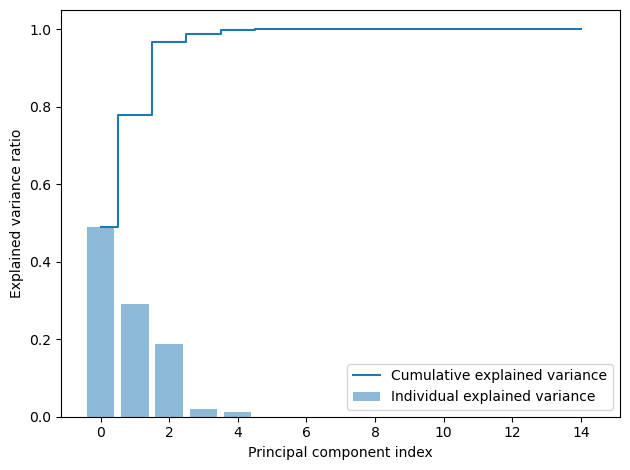

In [194]:
plt.bar(range(0,len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cumulative_variance_ratio)), cumulative_variance_ratio, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

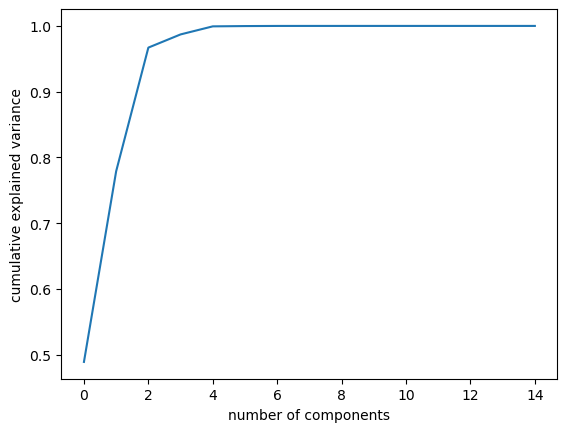

In [195]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [196]:
pca = PCA(n_components=3)
data_transformed = pca.fit_transform(imp)

In [202]:
Final_data = pd.concat([imp,y],axis=1)

In [203]:
Final_data.to_csv('Important_features.csv',index=False)

In [204]:
data = pd.read_csv('Important_features.csv')

In [205]:
data.head()

,InterestAndPenaltyBalance,PrincipalPaymentDifference,PrincipalPaymentsMade,PrincipalBalance,InterestAndPenaltyPaymentsMade,Interest,MonthlyPayment,Amount,AppliedAmount,LanguageCode,Rating,Country,Restructured,LoanDuration,MonthlyPaymentDay,Status_new
0,0.00,115.0408,115.0408,0.00,20.4222,30.0,130.393314,115.0408,319.5582,0,0,0,False,12,25,0
1,0.00,140.6057,140.6057,0.00,2.0227,25.0,130.393314,140.6057,191.7349,0,0,0,False,1,15,0
2,414.07,86.8409,203.1909,116.35,59.7626,25.0,130.393314,319.5409,319.5582,0,0,0,True,20,25,1
3,0.00,57.5205,57.5205,0.00,18.7323,45.0,130.393314,57.5205,127.8233,0,0,0,False,15,15,0
4,0.00,319.5436,319.5436,0.00,220.4200,30.0,130.393314,319.5436,319.5582,0,0,0,False,12,25,1


In [206]:
data.shape

(77394, 16)

# <font color=red>**Modelling**</font>

It is the mathematical representation of the output of the training process. Our project comes under the category of classification, which is a supervised learning method, we have done modelling using two algorithms 
- K-Nearest Neighbor(KNN) classifier
- XGBoost classifier
Steps involved are:
1. Data Preparation (Already done)
2. Splitting the data
3. Choosing a classification model. 
    - The above classification models for chosen for this task
4. Training the Model
5. Model Evaluation
    
    Using different metrics
    - Accuracy
    - Precision
    - Recall
    - F1 score
    - Area under the ROC Curve(AUC-ROC)
6. Model Validation
    - k-fold cross validation

In [129]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score

In [130]:
df = pd.read_csv('Important_features.csv')
df.head()

,InterestAndPenaltyBalance,PrincipalPaymentDifference,PrincipalPaymentsMade,PrincipalBalance,InterestAndPenaltyPaymentsMade,Interest,MonthlyPayment,Amount,AppliedAmount,LanguageCode,Rating,Country,Restructured,LoanDuration,MonthlyPaymentDay,Status_new
0,0.00,115.0408,115.0408,0.00,20.4222,30.0,130.393314,115.0408,319.5582,0,0,0,False,12,25,0
1,0.00,140.6057,140.6057,0.00,2.0227,25.0,130.393314,140.6057,191.7349,0,0,0,False,1,15,0
2,414.07,86.8409,203.1909,116.35,59.7626,25.0,130.393314,319.5409,319.5582,0,0,0,True,20,25,1
3,0.00,57.5205,57.5205,0.00,18.7323,45.0,130.393314,57.5205,127.8233,0,0,0,False,15,15,0
4,0.00,319.5436,319.5436,0.00,220.4200,30.0,130.393314,319.5436,319.5582,0,0,0,False,12,25,1


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77394 entries, 0 to 77393
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   InterestAndPenaltyBalance       77394 non-null  float64
 1   PrincipalPaymentDifference      77394 non-null  float64
 2   PrincipalPaymentsMade           77394 non-null  float64
 3   PrincipalBalance                77394 non-null  float64
 4   InterestAndPenaltyPaymentsMade  77394 non-null  float64
 5   Interest                        77394 non-null  float64
 6   MonthlyPayment                  77394 non-null  float64
 7   Amount                          77394 non-null  float64
 8   AppliedAmount                   77394 non-null  float64
 9   LanguageCode                    77394 non-null  int64  
 10  Rating                          77394 non-null  int64  
 11  Country                         77394 non-null  int64  
 12  Restructured                    

In [132]:
X = df.copy()
y = X.pop('Status_new')

In [133]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Here, X_train and y_train will contain 80% of the data for training, and X_test and y_test will contain 20% for testing.
# test_size specifies the proportion of the dataset to include in the testing split, while random_state ensures reproducibility.

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)

Training data shape: (61915, 15)
Testing data shape: (15479, 15)
Training labels shape: (61915,)
Testing labels shape: (15479,)


In [134]:
st= StandardScaler()
x_train= st.fit_transform(X_train)
x_test= st.transform(X_test)

### **KNN Classifier**

The K-NN working can be explained on the basis of the below algorithm:

Step-1: Select the number K of the neighbors<br>
Step-2: Calculate the Euclidean distance of K number of neighbors<br>
Step-3: Take the K nearest neighbors as per the calculated Euclidean distance.<br>
Step-4: Among these k neighbors, count the number of the data points in each category.<br>
Step-5: Assign the new data points to that category for which the number of the neighbor is maximum.<br>
Step-6: Our model is ready.<br>

Training dataset

In [135]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_train)
accuracy = accuracy_score(y_train,y_pred_knn)
print('Training Accuracy:',accuracy)

Training Accuracy: 0.9504643462811919


In [136]:
print(classification_report(y_train, y_pred_knn))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     27739
           1       0.98      0.93      0.95     34176

    accuracy                           0.95     61915
   macro avg       0.95      0.95      0.95     61915
weighted avg       0.95      0.95      0.95     61915



Text(0.5, 1.0, 'Predicted values with k=5')

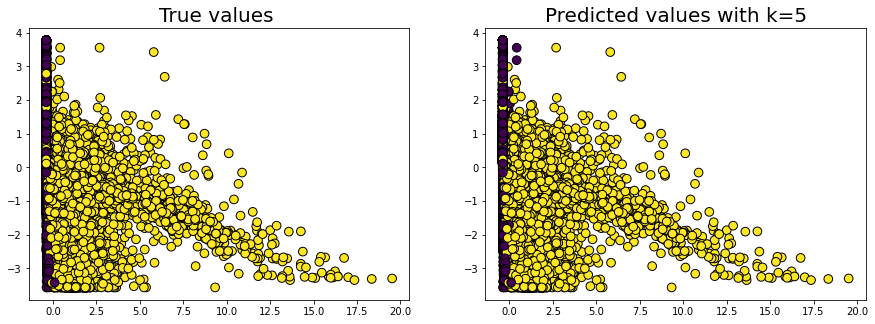

In [137]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.scatter(x_train[:,0], x_train[:,1], c=y_train,s=75, edgecolor='black')
plt.title("True values ", fontsize=20)

plt.subplot(1,2,2)
plt.scatter(x_train[:,0], x_train[:,1], c=y_pred_knn, s=75, edgecolor='black')
plt.title("Predicted values with k=5", fontsize=20)

In [138]:
fpr, tpr, thresholds = roc_curve(y_train, y_pred_knn)

# Calculate the area under the ROC curve (AUC)
auc = roc_auc_score(y_train, y_pred_knn)
auc

0.9526577608310302

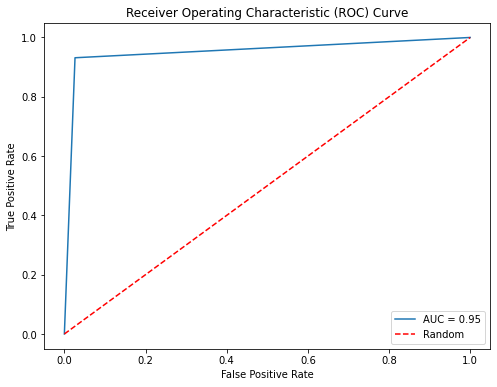

In [139]:
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

For test dataset

In [140]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracy = accuracy_score(y_test,y_pred_knn)
print('Testing Accuracy:',accuracy)

Testing Accuracy: 0.9342980812714


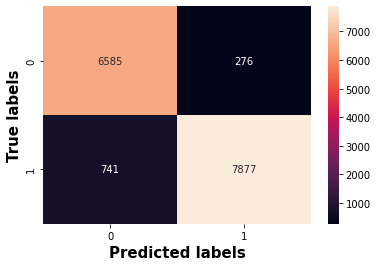

In [141]:
cm_knn = confusion_matrix(y_test, y_pred_knn)

sns.heatmap(cm_knn, annot=True, fmt='g')
plt.xlabel('Predicted labels',fontsize=15, fontweight='bold')
plt.ylabel('True labels', fontsize=15, fontweight='bold')
plt.show()

In [142]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      6861
           1       0.97      0.91      0.94      8618

    accuracy                           0.93     15479
   macro avg       0.93      0.94      0.93     15479
weighted avg       0.94      0.93      0.93     15479



Text(0.5, 1.0, 'Predicted values with k=5')

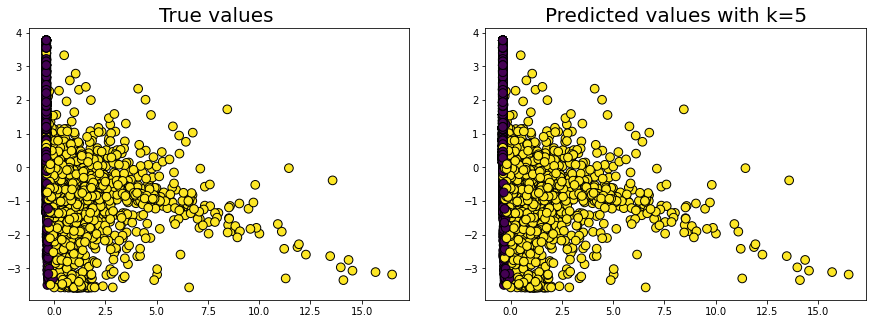

In [143]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.scatter(x_test[:,0], x_test[:,1], c=y_test,s=75, edgecolor='black')
plt.title("True values ", fontsize=20)

plt.subplot(1,2,2)
plt.scatter(x_test[:,0], x_test[:,1], c=y_pred_knn, s=75, edgecolor='black')
plt.title("Predicted values with k=5", fontsize=20)

In [144]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_knn)

# Calculate the area under the ROC curve (AUC)
auc = roc_auc_score(y_test, y_pred_knn)
auc

0.9368949006274478

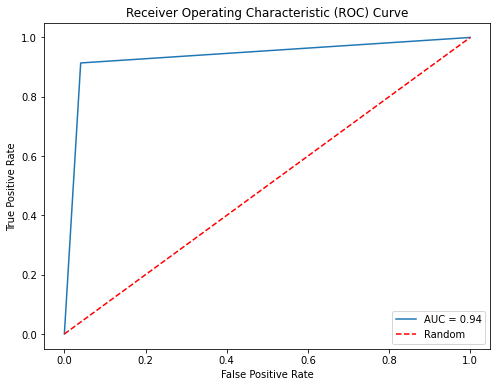

In [145]:
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

### Model Validation

Validate the performance of the optimized model using additional evaluation techniques such as cross-validation. These techniques help assess the model's ability to generalize to unseen data and avoid overfitting.


Let's do this using ***K-fold cross validation***.

In this method, instead of splitting the data a single time, we split the data multiplied based on the value of K.Then the model will split the dataset k times and will choose different training and testing sets every single time.

By doing we get a significant advantage in that the model can test on all the data, and the model would not be biased.

In [146]:
# Perform k-fold cross-validation
k = 10  # number of folds
scores = cross_val_score(knn, X, y, cv=k, scoring='accuracy')

# Print the accuracy scores for each fold
print("Accuracy scores for each fold:")
for i, score in enumerate(scores):
    print(f"Fold {i+1}: {score:.4f}")

# Calculate and print the mean accuracy score across all folds
mean_score = np.mean(scores)
max_score = np.max(scores)
print(f"\nMean accuracy score: {mean_score:.4f}")
print(f"\nMax accuracy score: {max_score:.4f}")

Accuracy scores for each fold:
Fold 1: 0.8699
Fold 2: 0.9243
Fold 3: 0.9235
Fold 4: 0.9319
Fold 5: 0.9378
Fold 6: 0.9285
Fold 7: 0.9300
Fold 8: 0.9198
Fold 9: 0.9103
Fold 10: 0.8844

Mean accuracy score: 0.9160

Max accuracy score: 0.9378


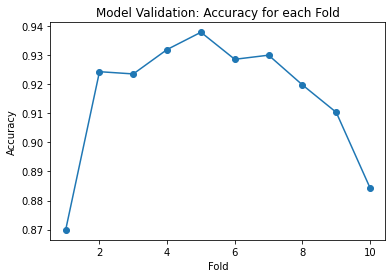

In [147]:
plt.plot(range(1, k+1), scores, marker='o')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Model Validation: Accuracy for each Fold')
plt.show()

### XGBClassifier

* XGBoost is a machine learning algorithm used for supervised learning tasks.<br>
* It builds an ensemble of weak learners, typically shallow decision trees, in a sequential manner.
* Each subsequent tree is trained to correct the errors made by the previous trees.
* XGBoost incorporates regularization techniques to prevent overfitting and improve generalization.

For train dataset

In [148]:
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred_xgb = model.predict(X_train)
accuracy = accuracy_score(y_train,y_pred_xgb)
print("Training Accuracy: ", accuracy)

Training Accuracy:  0.9745618993781797


In [149]:
print(classification_report(y_train, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     27739
           1       1.00      0.96      0.98     34176

    accuracy                           0.97     61915
   macro avg       0.97      0.98      0.97     61915
weighted avg       0.98      0.97      0.97     61915



Text(0.5, 1.0, 'Predicted values with XGBClassifier')

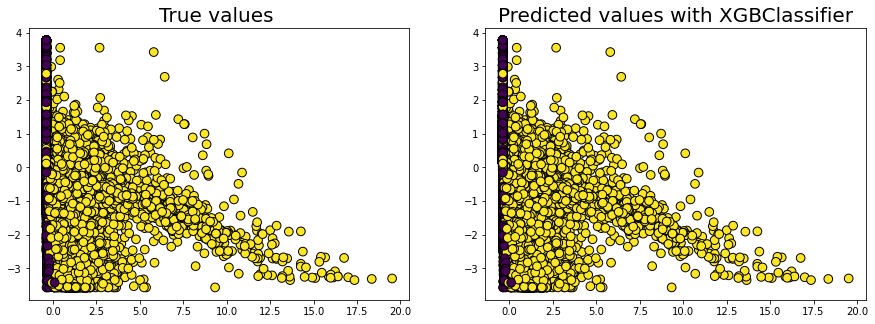

In [150]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.scatter(x_train[:,0], x_train[:,1], c=y_train,s=75, edgecolor='black')
plt.title("True values ", fontsize=20)

plt.subplot(1,2,2)
plt.scatter(x_train[:,0], x_train[:,1], c=y_pred_xgb, s=75, edgecolor='black')
plt.title("Predicted values with XGBClassifier", fontsize=20)

In [151]:
fpr, tpr, thresholds = roc_curve(y_train, y_pred_xgb)

# Calculate the area under the ROC curve (AUC)
auc = roc_auc_score(y_train, y_pred_xgb)
auc

0.9764177069278601

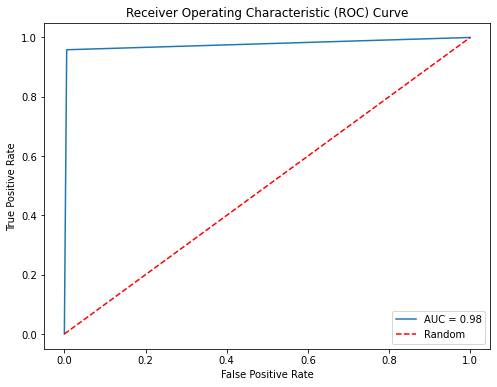

In [152]:
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

for test dataset

In [153]:
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred_xgb = model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred_xgb)
print('Testing Accuracy:',accuracy)

Testing Accuracy: 0.9607855804638542


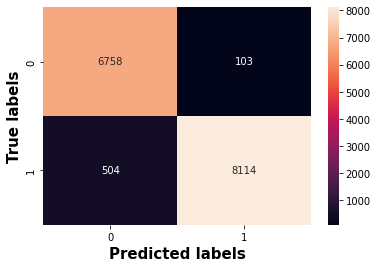

In [154]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

sns.heatmap(cm_xgb, annot=True, fmt='g')
plt.xlabel('Predicted labels',fontsize=15, fontweight='bold')
plt.ylabel('True labels', fontsize=15, fontweight='bold')
plt.show()

In [155]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96      6861
           1       0.99      0.94      0.96      8618

    accuracy                           0.96     15479
   macro avg       0.96      0.96      0.96     15479
weighted avg       0.96      0.96      0.96     15479



Text(0.5, 1.0, 'Predicted values with XGBClassifier')

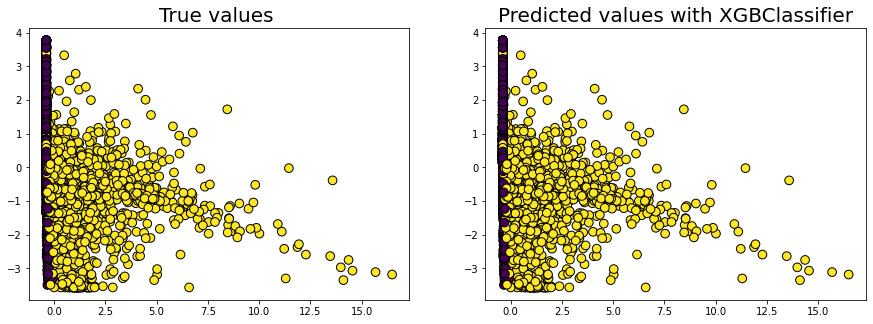

In [156]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.scatter(x_test[:,0], x_test[:,1], c=y_test,s=75, edgecolor='black')
plt.title("True values ", fontsize=20)

plt.subplot(1,2,2)
plt.scatter(x_test[:,0], x_test[:,1], c=y_pred_xgb, s=75, edgecolor='black')
plt.title("Predicted values with XGBClassifier", fontsize=20)

In [157]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_xgb)

# Calculate the area under the ROC curve (AUC)
auc = roc_auc_score(y_test, y_pred_xgb)
auc

0.9632526823372536

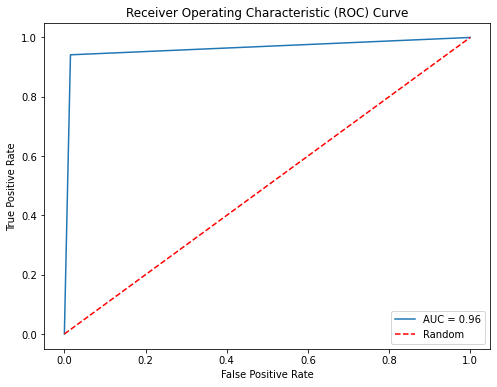

In [158]:
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

### Model Validation

In [159]:
k = 10  # number of folds
scores = cross_val_score(model, X, y, cv=k, scoring='accuracy')

# Print the accuracy scores for each fold
print("Accuracy scores for each fold:")
for i, score in enumerate(scores):
    print(f"Fold {i+1}: {score:.4f}")

# Calculate and print the mean accuracy score across all folds
mean_score = np.mean(scores)
max_score = np.max(scores)
print(f"\nMean accuracy score: {mean_score:.4f}")
print(f"\nMax accuracy score: {max_score:.4f}")

Accuracy scores for each fold:
Fold 1: 0.9080
Fold 2: 0.9525
Fold 3: 0.9484
Fold 4: 0.9610
Fold 5: 0.9664
Fold 6: 0.9603
Fold 7: 0.9650
Fold 8: 0.9518
Fold 9: 0.9484
Fold 10: 0.8970

Mean accuracy score: 0.9459

Max accuracy score: 0.9664


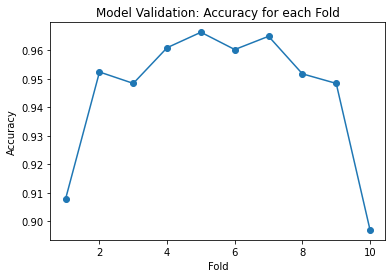

In [160]:
plt.plot(range(1, k+1), scores, marker='o')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Model Validation: Accuracy for each Fold')
plt.show()